In [21]:
### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import folium
import pickle
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
%matplotlib inline
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [23]:
pd.__version__

'1.1.3'

In [24]:
### Reading Data Set

In [25]:
df = pd.read_csv('mental_health_data.csv')
df.head()

,age,gender,race,country,are you self-employed?,how many employees does your company or organization have?,is your employer primarily a tech company/organization?,is your primary role within your company related to tech/it?,does your employer provide mental health benefits as part of healthcare coverage?,do you know the options for mental health care available under your employer-provided health coverage?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",does your employer offer resources to learn more about mental health disorders and options for seeking help?,is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",would you feel more comfortable talking to your coworkers about your physical health or your mental health?,would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,have you ever discussed your mental health with your employer?,would you feel comfortable discussing a mental health issue with your coworkers?,have you ever discussed your mental health with coworkers?,have you ever had a coworker discuss their or another coworker's mental health with you?,"overall, how much importance does your employer place on physical health?","overall, how much importance does your employer place on mental health?",do you have previous employers?,do you currently have a mental health disorder?,have you had a mental health disorder in the past?,have you been diagnosed with a mental health condition by a medical professional?,have you ever sought treatment for a mental health disorder from a mental health professional?,do you have a family history of mental illness?,"if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?","if you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?",have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,would you be willing to bring up a physical health issue with a potential employer in an interview?,would you bring up your mental health with a potential employer in an interview?,are you openly identified at work as a person with a mental health issue?
0,37.0,Female,NaN,United States of America,NaN,6-25,Yes,NaN,Yes,Not sure,No,Yes,Yes,Somewhat easy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,NaN,Maybe,No,NaN
1,44.0,Male,NaN,United States of America,NaN,More than 1000,No,NaN,Don't know,No,Don't know,Don't know,Don't know,Don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,No,No,NaN
2,32.0,Male,NaN,Canada,NaN,6-25,Yes,NaN,No,No,No,No,Don't know,Somewhat difficult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,Yes,Yes,NaN
3,31.0,Male,NaN,United Kingdom,NaN,26-100,Yes,NaN,No,Yes,No,No,No,Somewhat difficult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,Maybe,Maybe,NaN
4,31.0,Male,NaN,United States of America,NaN,100-500,Yes,NaN,Yes,No,Don't know,Don't know,Don't know,Don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,Yes,Yes,NaN


In [26]:
### Shape of Data

In [27]:
df.shape

(4218, 34)

In [28]:
### Columns and Data Types

In [29]:
data_types = pd.DataFrame(df.dtypes, columns = ['Data Type'])
data_types

,Data Type
age,float64
gender,object
race,object
country,object
are you self-employed?,object
how many employees does your company or organization have?,object
is your employer primarily a tech company/organization?,object
is your primary role within your company related to tech/it?,object
does your employer provide mental health benefits as part of healthcare coverage?,object
do you know the options for mental health care available under your employer-provided health coverage?,object


In [30]:
### Missing Values

In [31]:
missing_values = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_values['Percentage'] = round(df.isna().mean() * 100, 2)
missing_values.sort_values(by = 'Percentage')

,Missing Values,Percentage
would you be willing to bring up a physical health issue with a potential employer in an interview?,0,0.00
have you ever sought treatment for a mental health disorder from a mental health professional?,0,0.00
do you have a family history of mental illness?,0,0.00
would you bring up your mental health with a potential employer in an interview?,0,0.00
country,2,0.05
age,8,0.19
are you self-employed?,18,0.43
gender,39,0.92
"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",504,11.95
does your employer offer resources to learn more about mental health disorders and options for seeking help?,504,11.95


In [32]:
### Cleaning the Columns

imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'No')
imputer.fit(df[['have you been diagnosed with a mental health condition by a medical professional?']])
df[['have you been diagnosed with a mental health condition by a medical professional?']] = imputer.transform(df[['have you been diagnosed with a mental health condition by a medical professional?']])

In [33]:
### Data set of People Diagnosed

In [34]:
df_y = df[df['have you been diagnosed with a mental health condition by a medical professional?'] == 'Yes']

In [35]:
### 1. Age

This column has 8 null values in entire data set and 2 null values in diagnosed data set


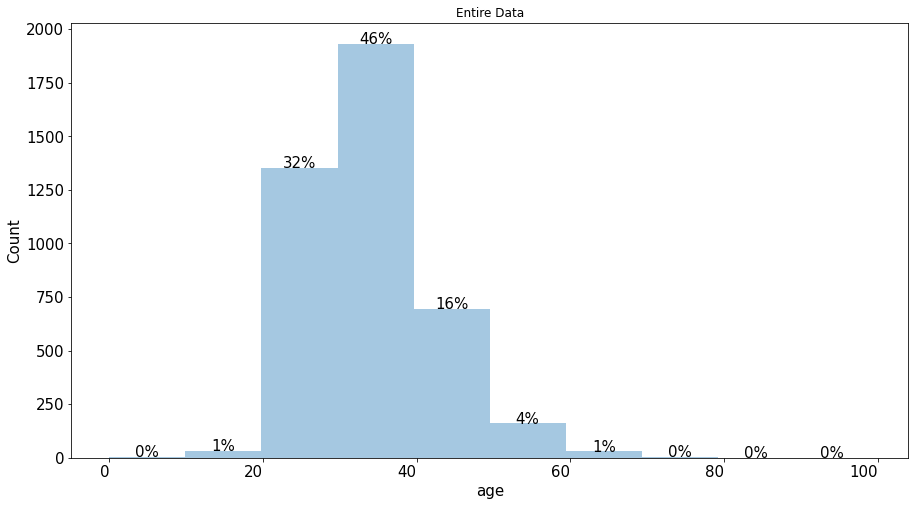

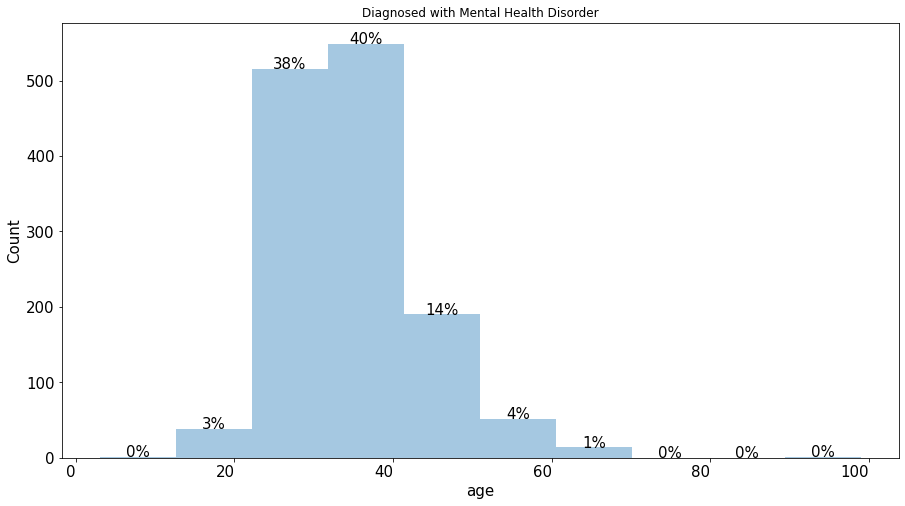

In [36]:
col = 'age'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col], kde = False, bins = 10)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df_y[col], kde = False, bins = 10)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [37]:
### 2. Gender

This column has 39 null values in entire data set and 16 null values in diagnosed data set


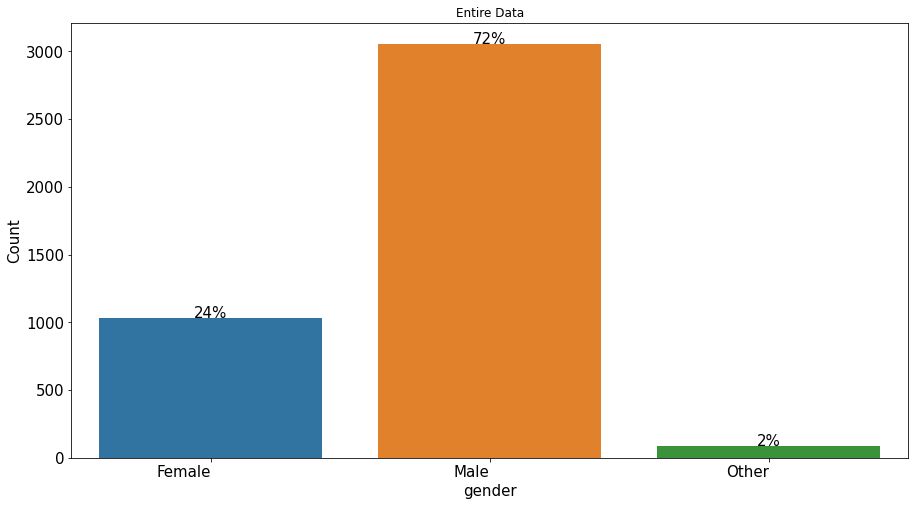

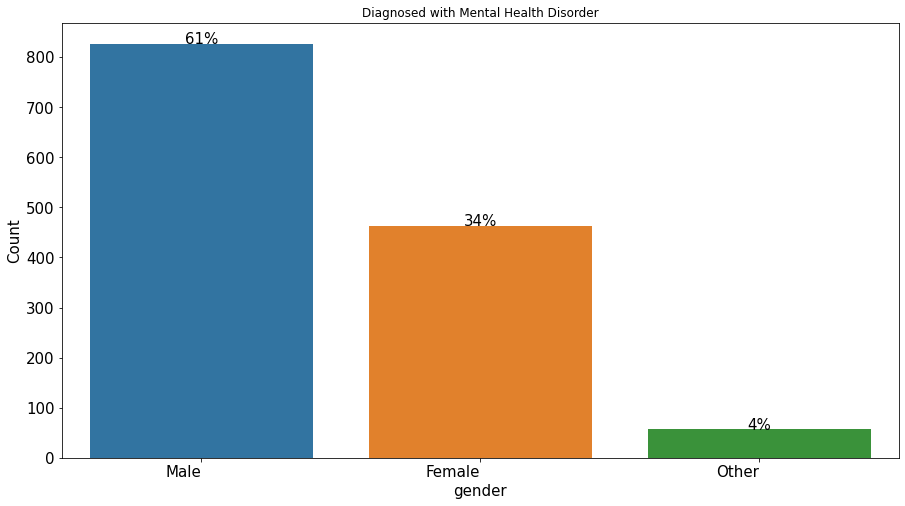

In [38]:
col = 'gender'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [39]:
### 3. Race

This column has 3230 null values in entire data set and 862 null values in diagnosed data set


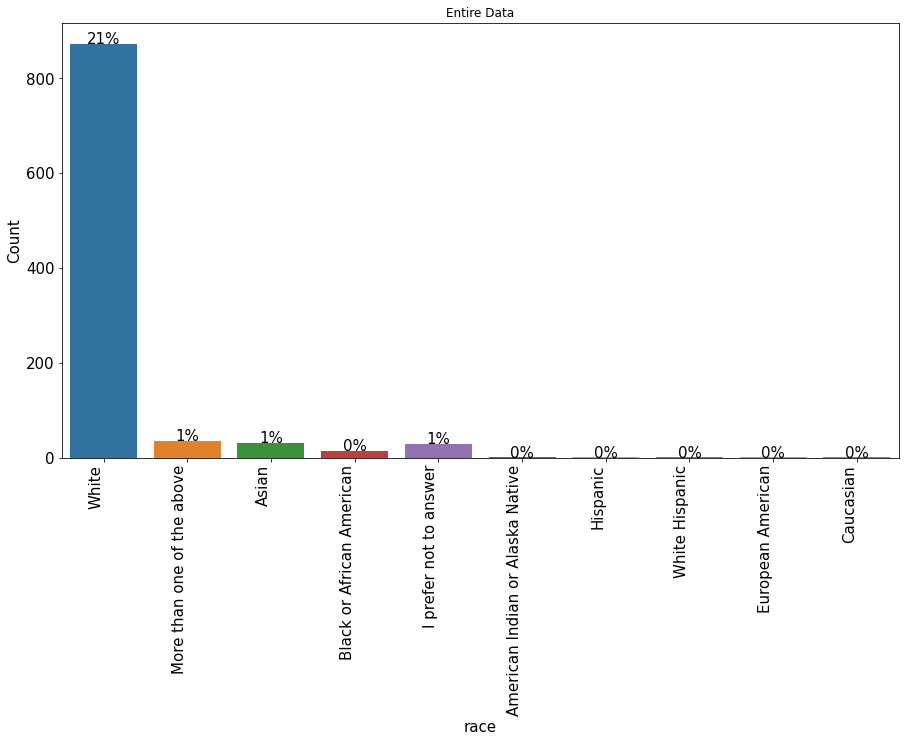

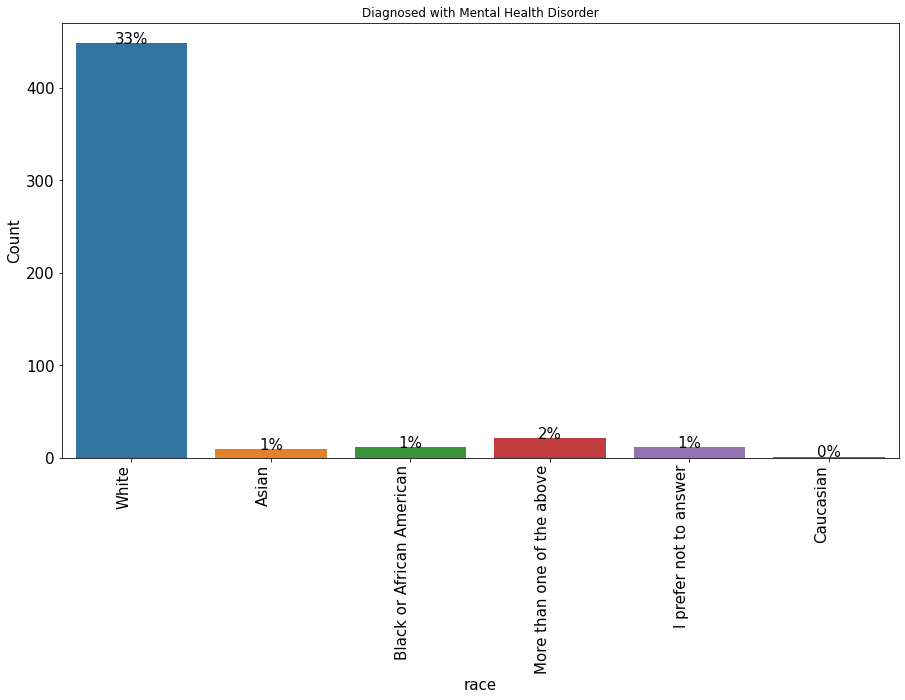

In [40]:
col = 'race'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 90, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 90, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [41]:
### 4. Country

In [42]:
individuals = pd.Series.to_frame(df['country'].value_counts())
individuals.reset_index(inplace = True)
print('Entire Data')
world_map = folium.Map()
world_geo = r'world-countries.json'
world_map.choropleth(
    geo_data = world_geo,
    data = individuals,
    columns = ['index', 'country'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', 
    fill_opacity = 10, 
    line_opacity = 10,
    legend_name = 'Number of Individuals'
)
world_map

Entire Data


In [43]:
individuals = pd.Series.to_frame(df_y['country'].value_counts())
individuals.reset_index(inplace = True)
print('Diagnosed with Mental Health Disorder')
world_map = folium.Map()
world_geo = r'world-countries.json'
world_map.choropleth(
    geo_data = world_geo,
    data = individuals,
    columns = ['index', 'country'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', 
    fill_opacity = 10, 
    line_opacity = 10,
    legend_name = 'Number of Individuals'
)
world_map

Diagnosed with Mental Health Disorder


In [44]:
### 5. Are you self-employed?

This column has 18 null values in entire data set and 0 null values in diagnosed data set


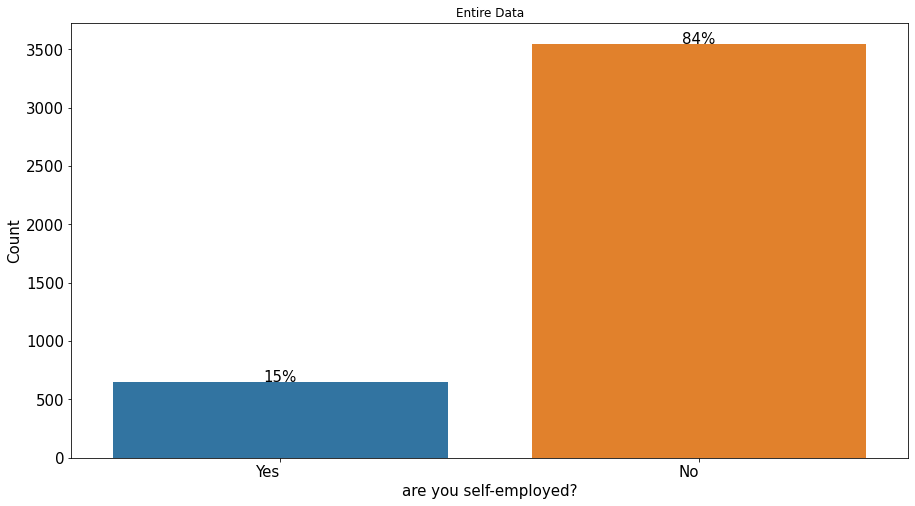

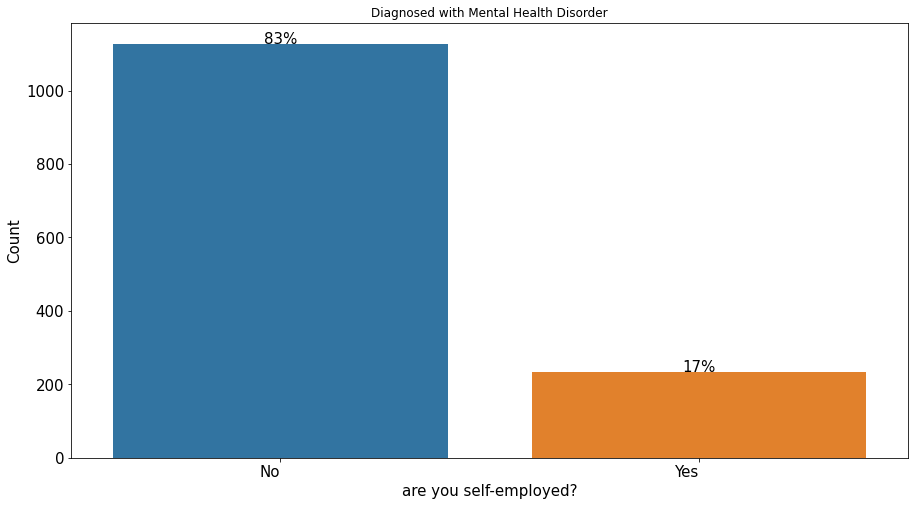

In [45]:
col = 'are you self-employed?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [46]:
### 6. How many employees does your company or organization have?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


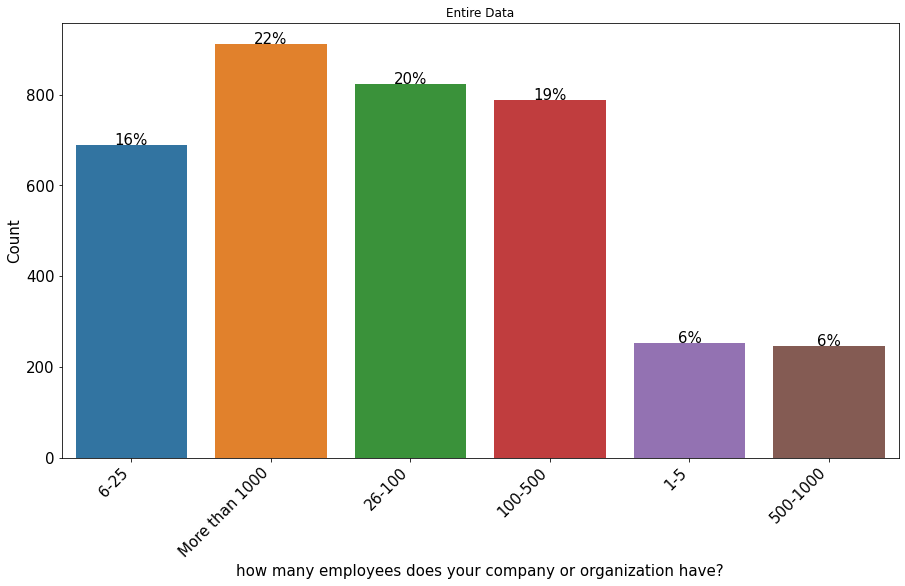

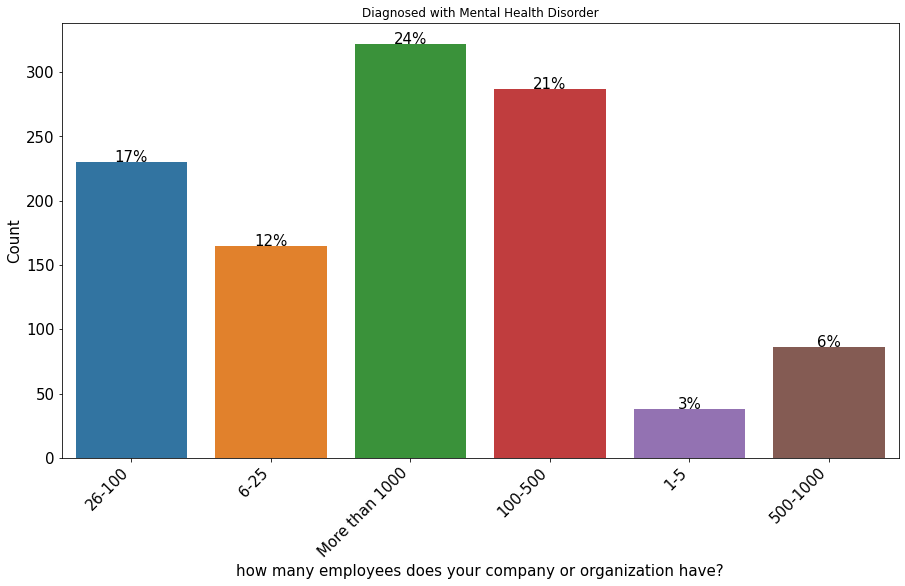

In [47]:
col = 'how many employees does your company or organization have?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [48]:
### 7. Is your employer primarily a tech company/organization?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


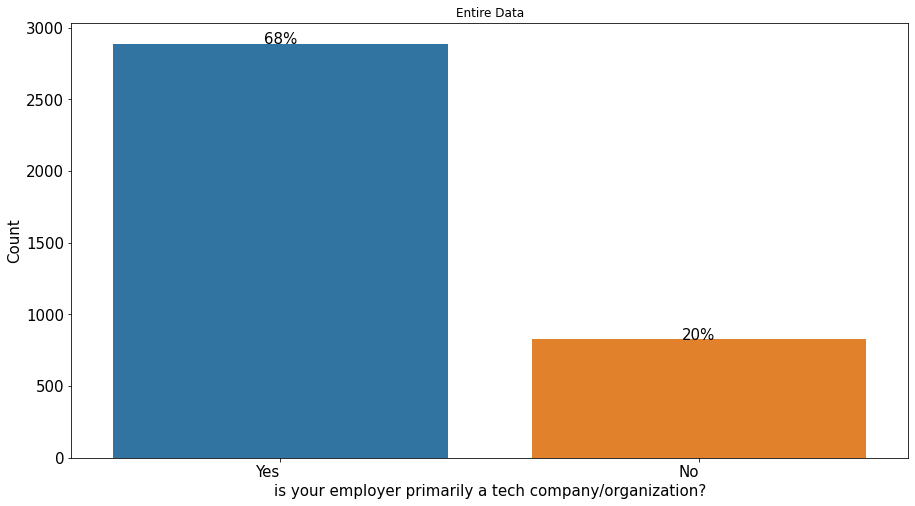

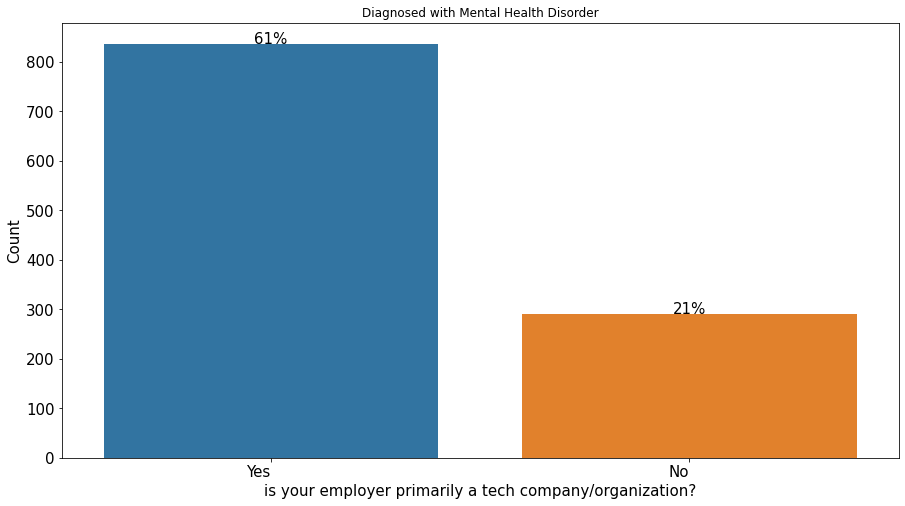

In [49]:
col = 'is your employer primarily a tech company/organization?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [50]:
### 8. Is your primary role within your company related to tech/IT?

This column has 2647 null values in entire data set and 669 null values in diagnosed data set


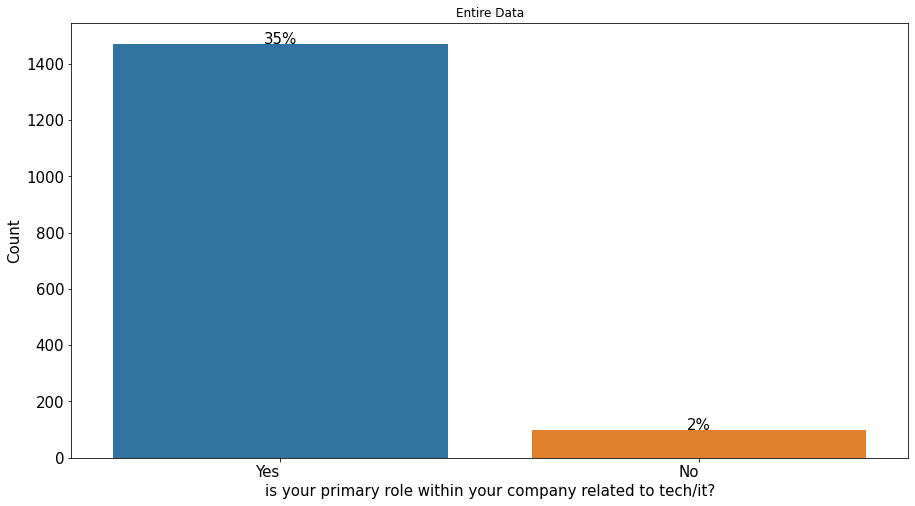

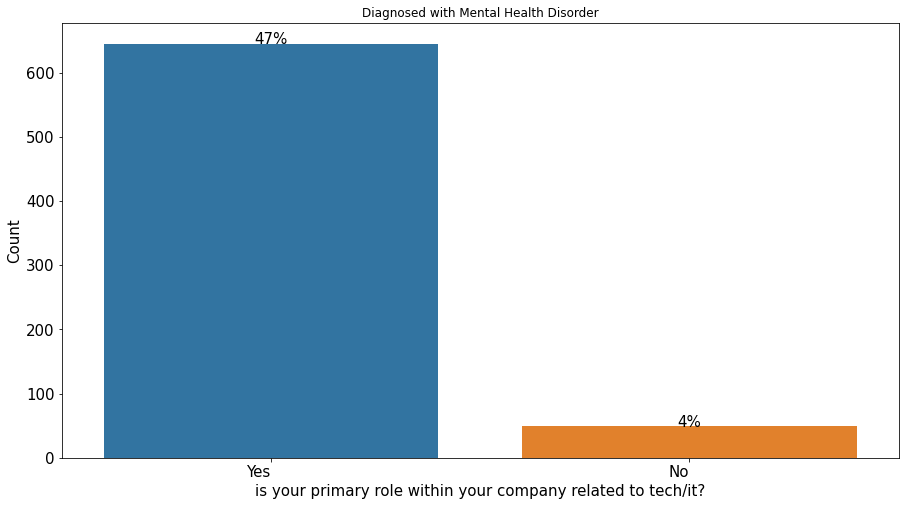

In [51]:
col = 'is your primary role within your company related to tech/it?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [52]:
### 9. Does your employer provide mental health benefits as part of healthcare coverage?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


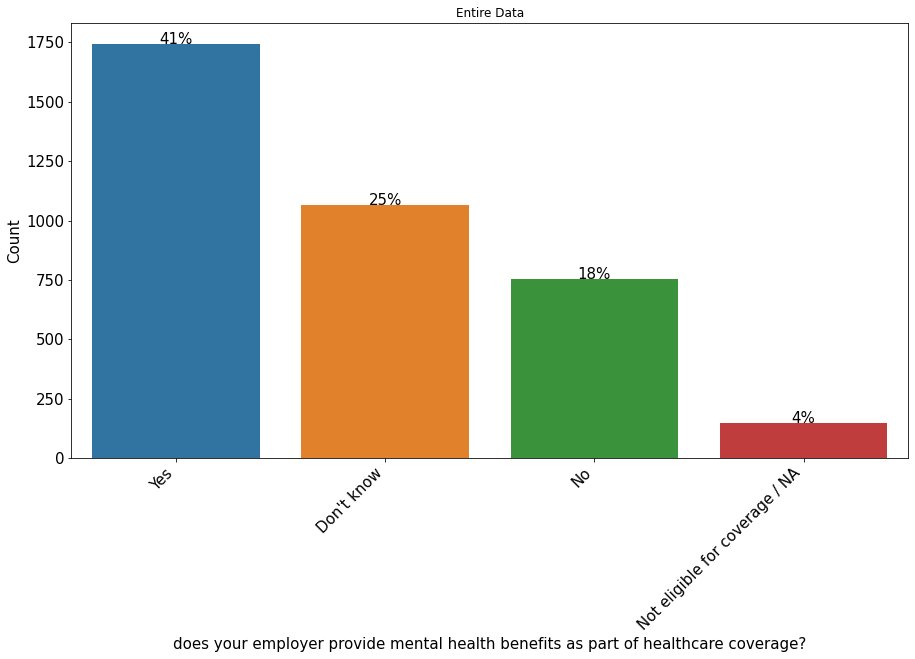

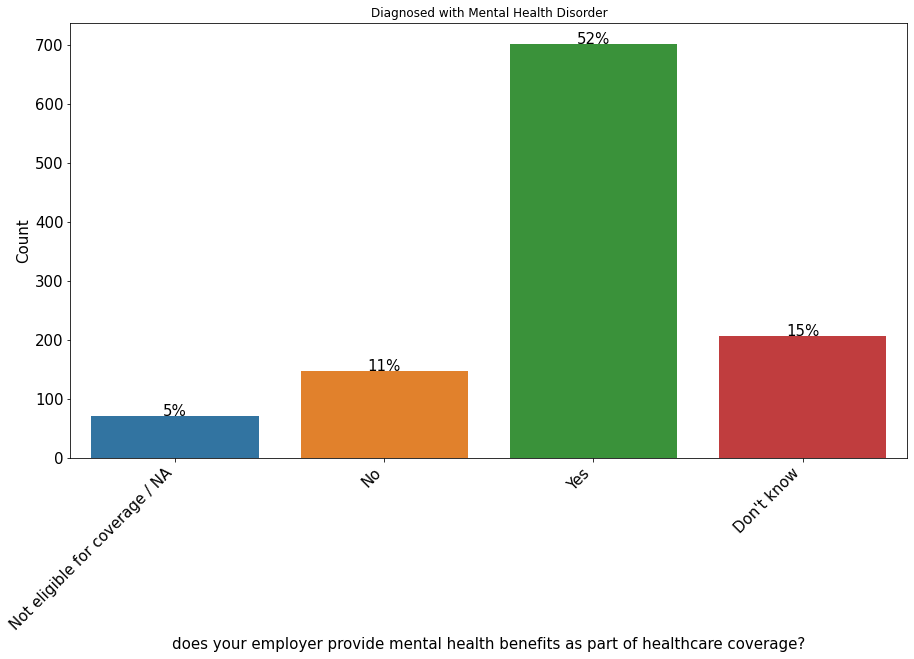

In [53]:
col = 'does your employer provide mental health benefits as part of healthcare coverage?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [54]:
### 10. Do you know the options for mental health care available under your employer-provided health coverage?

This column has 767 null values in entire data set and 340 null values in diagnosed data set


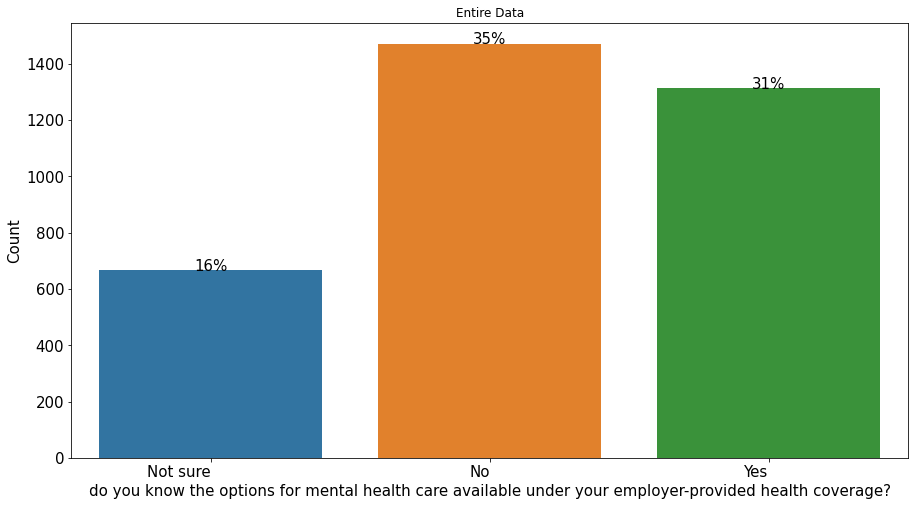

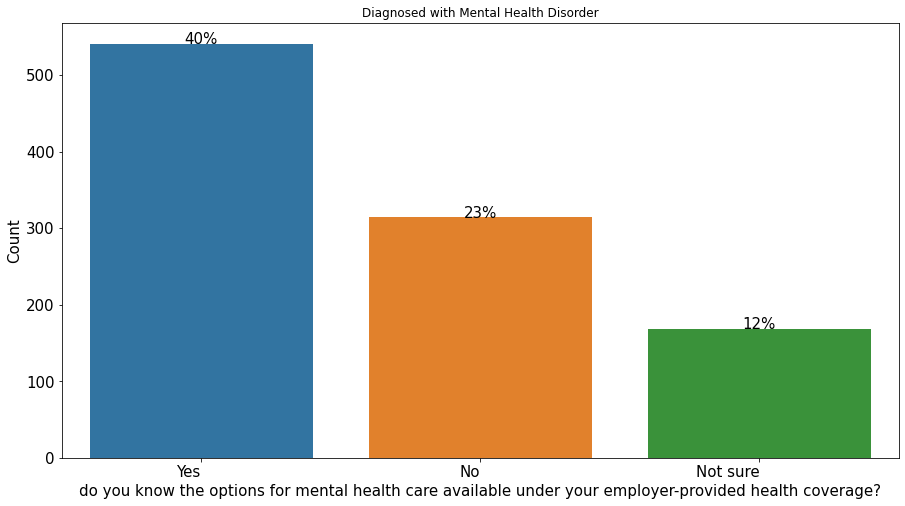

In [55]:
col = 'do you know the options for mental health care available under your employer-provided health coverage?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [56]:
### 11. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


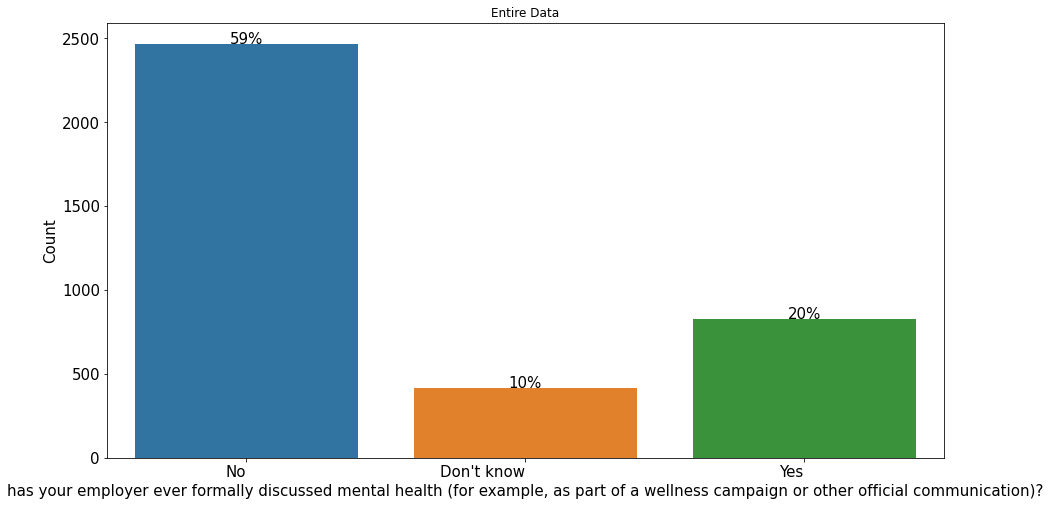

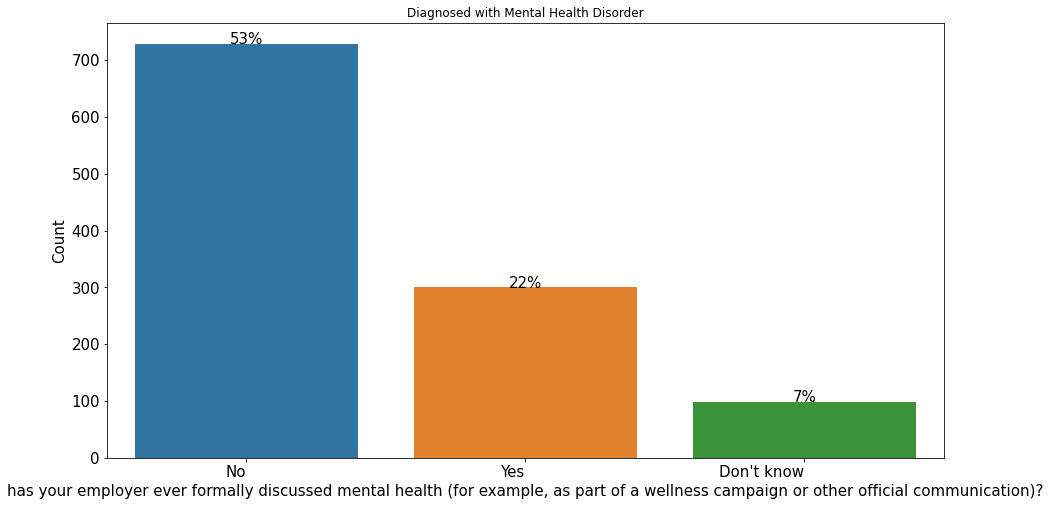

In [57]:
col = 'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [58]:
### 12. Does your employer offer resources to learn more about mental health disorders and options for seeking help?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


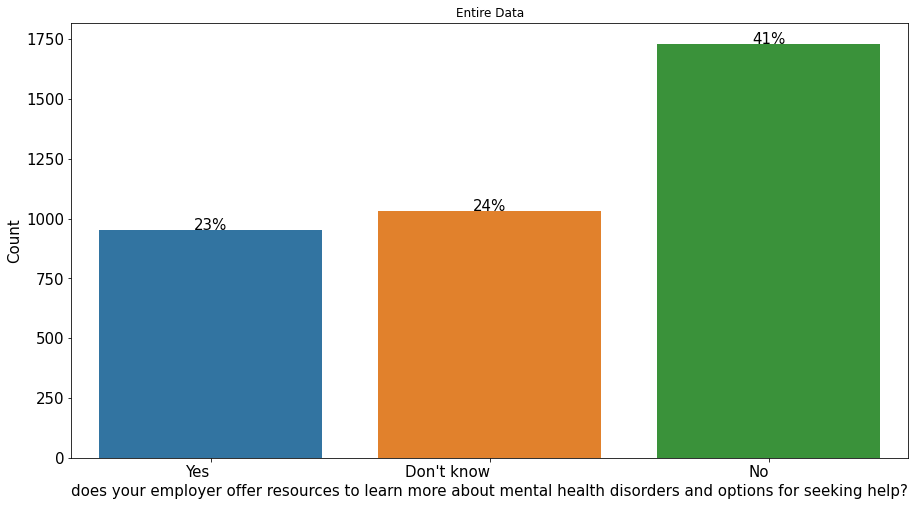

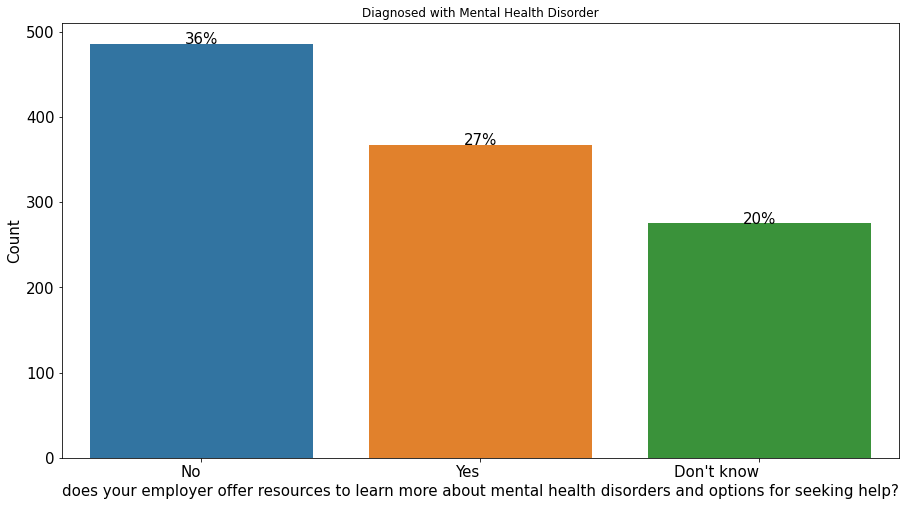

In [59]:
col = 'does your employer offer resources to learn more about mental health disorders and options for seeking help?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [60]:
### 13. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


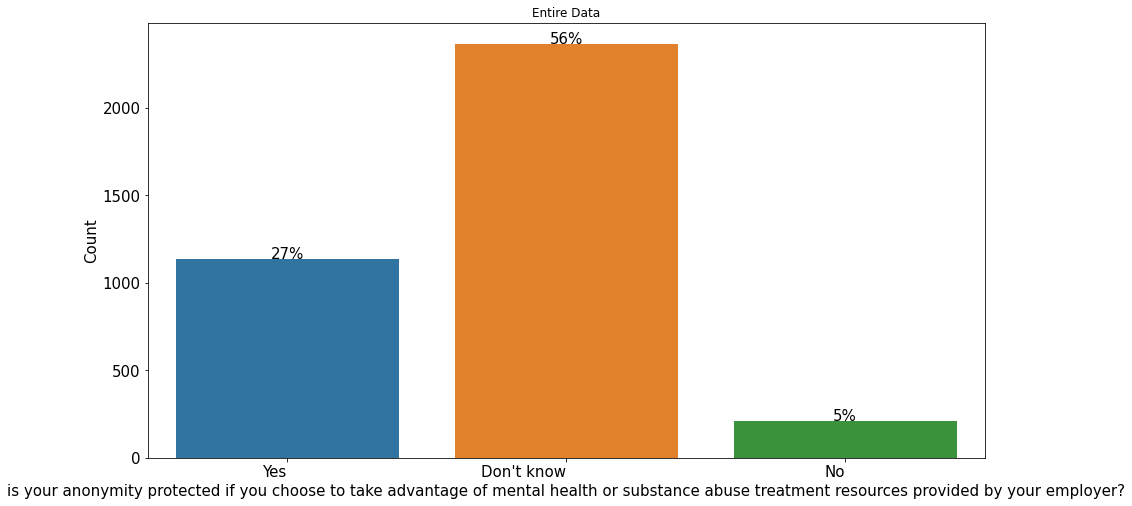

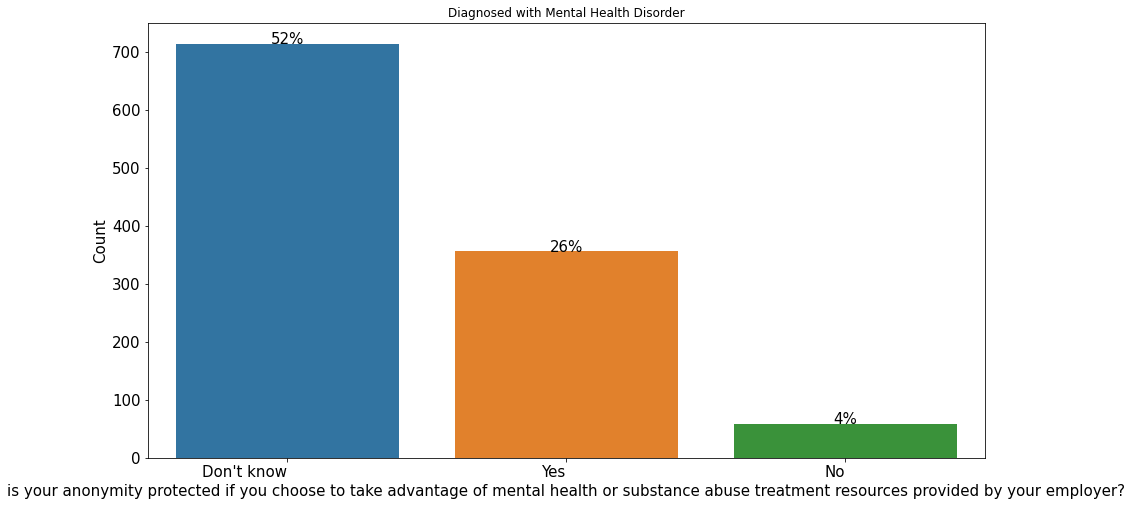

In [61]:
col = 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [62]:
### 14. If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

This column has 504 null values in entire data set and 235 null values in diagnosed data set


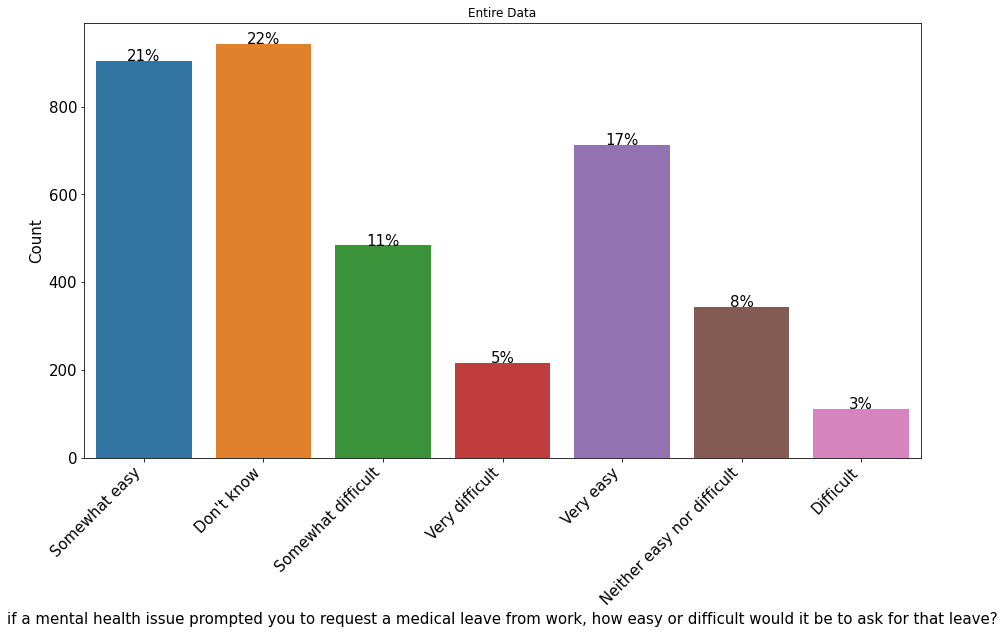

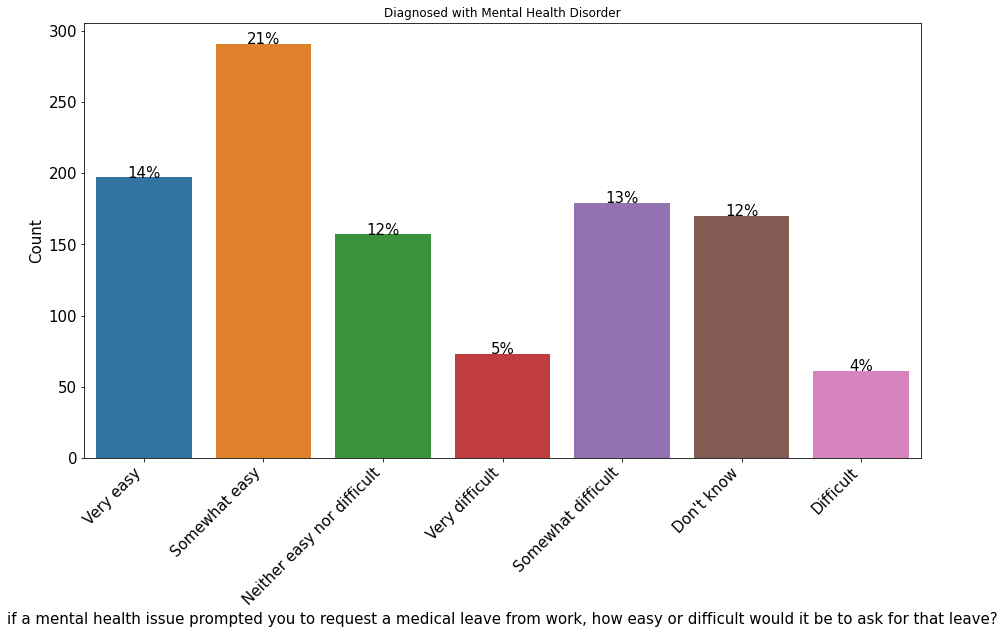

In [63]:
col = 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [64]:
### 15. Would you feel more comfortable talking to your coworkers about your physical health or your mental health?

This column has 2910 null values in entire data set and 802 null values in diagnosed data set


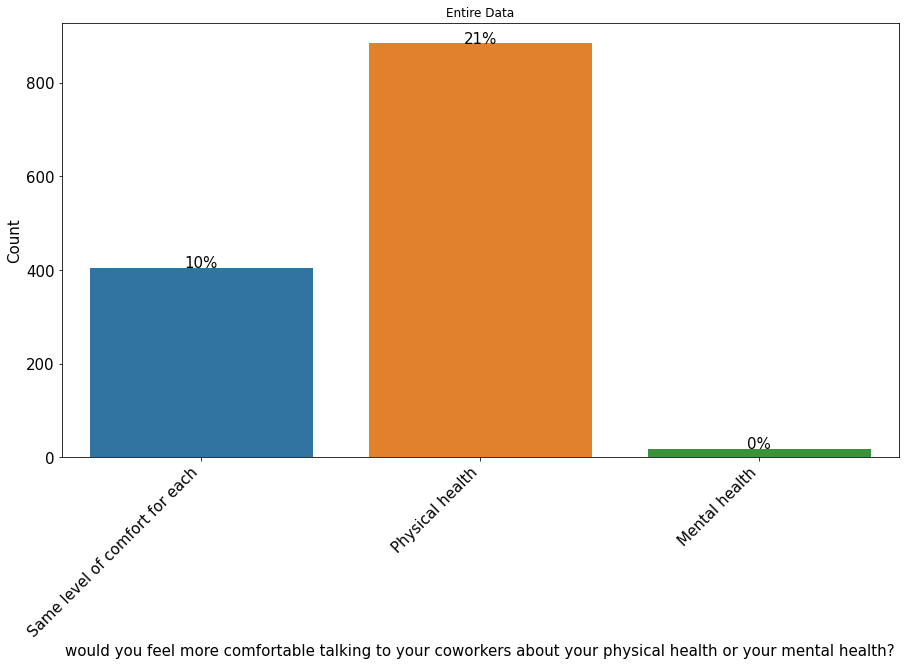

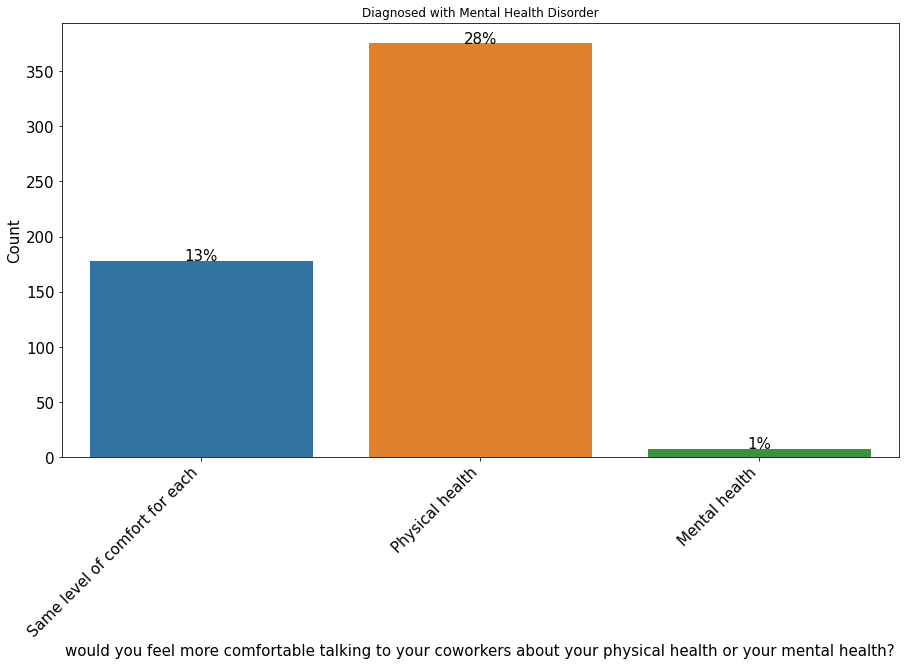

In [65]:
col = 'would you feel more comfortable talking to your coworkers about your physical health or your mental health?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [66]:
### 16. Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?

This column has 1764 null values in entire data set and 235 null values in diagnosed data set


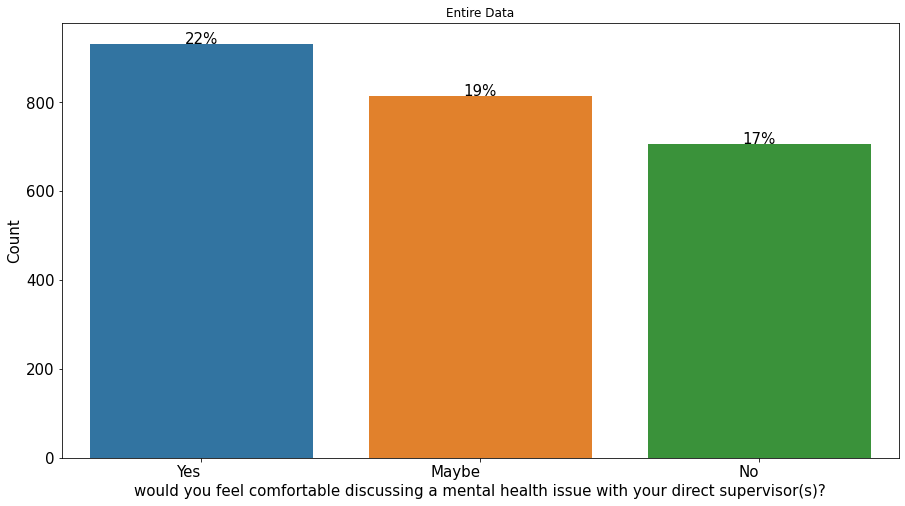

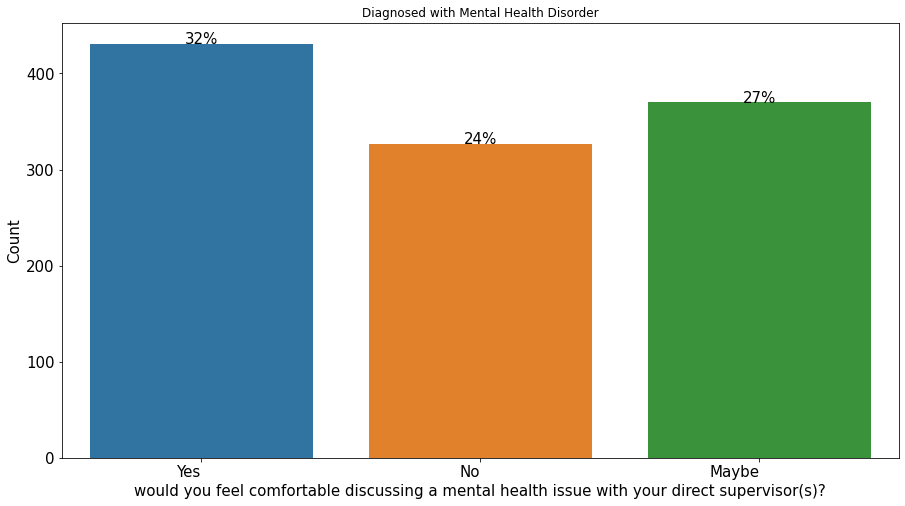

In [67]:
col = 'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [68]:
### 17. Have you ever discussed your mental health with your employer?

This column has 2910 null values in entire data set and 802 null values in diagnosed data set


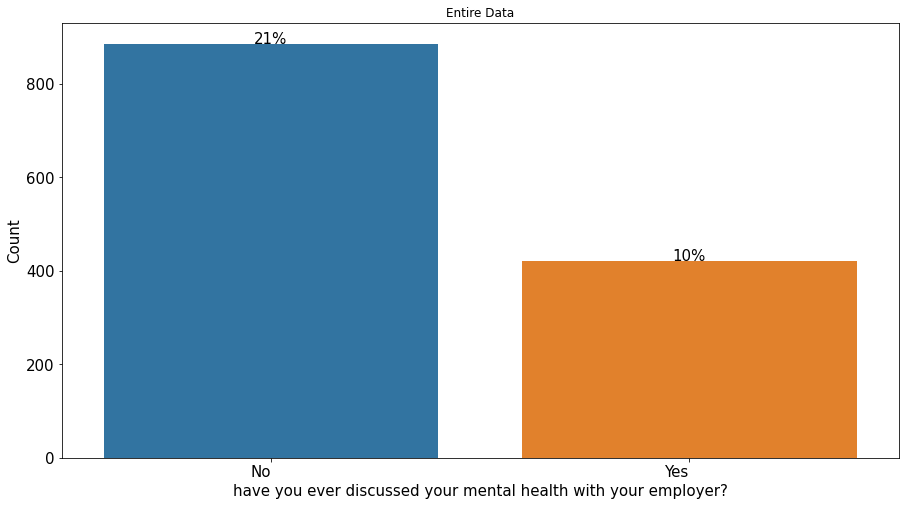

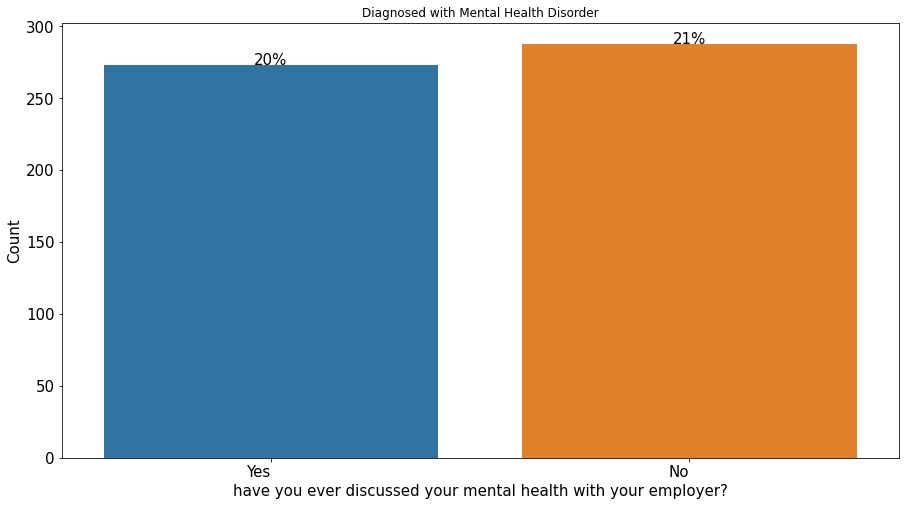

In [69]:
col = 'have you ever discussed your mental health with your employer?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [70]:
### 18. Would you feel comfortable discussing a mental health issue with your coworkers?

This column has 1764 null values in entire data set and 235 null values in diagnosed data set


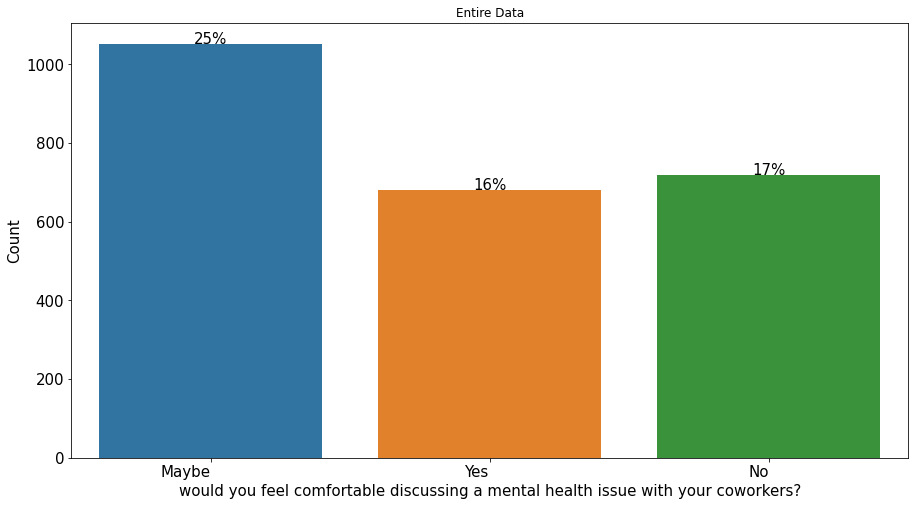

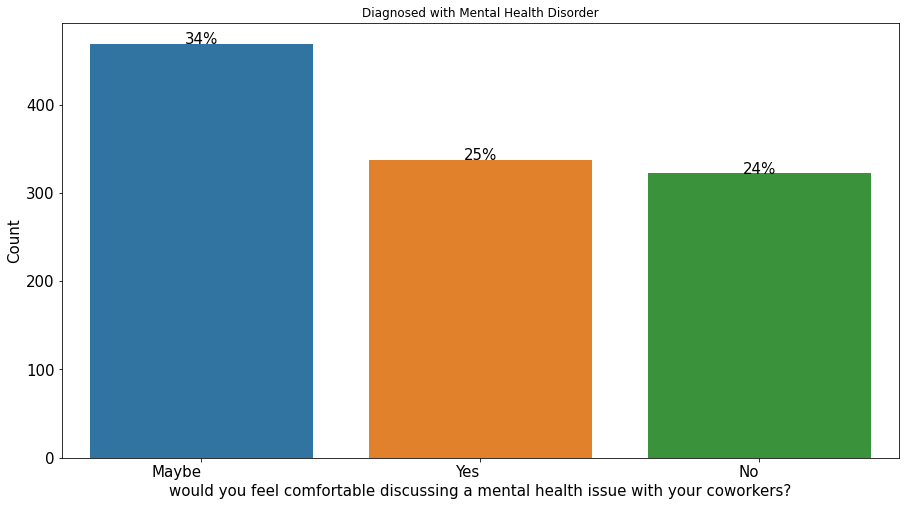

In [71]:
col = 'would you feel comfortable discussing a mental health issue with your coworkers?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [72]:
### 19. Have you ever discussed your mental health with coworkers?

This column has 2914 null values in entire data set and 804 null values in diagnosed data set


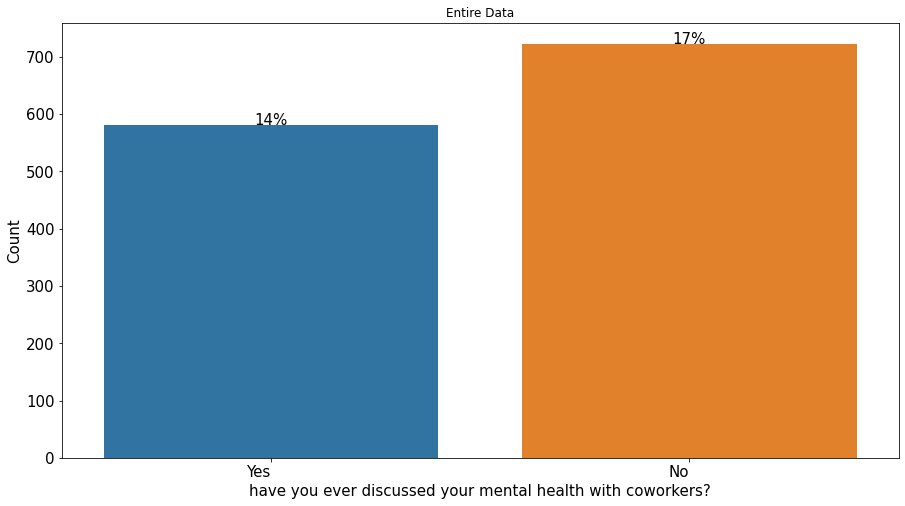

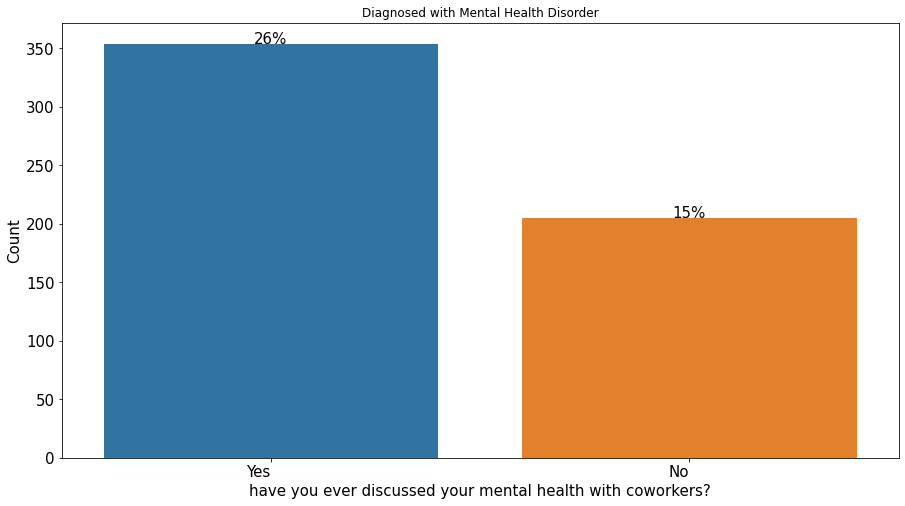

In [73]:
col = 'have you ever discussed your mental health with coworkers?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [74]:
### 20. Have you ever had a coworker discuss their or another coworker's mental health with you?

This column has 2916 null values in entire data set and 803 null values in diagnosed data set


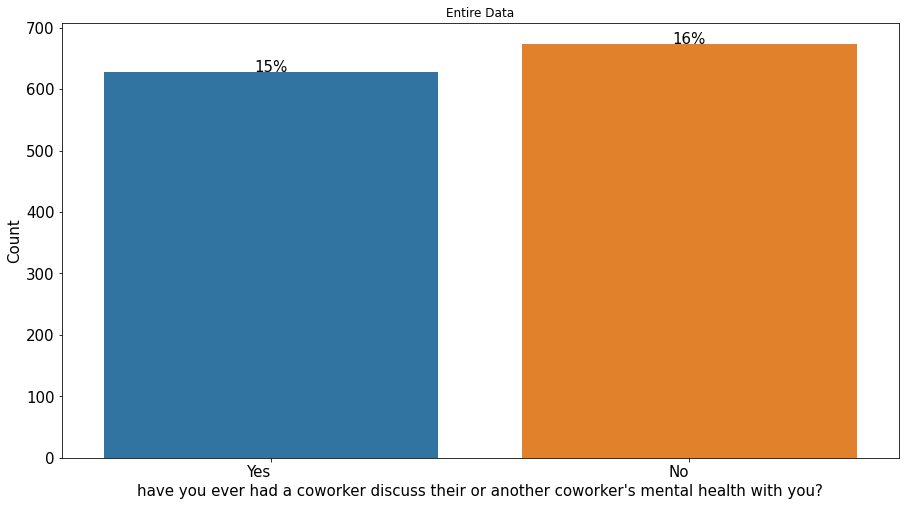

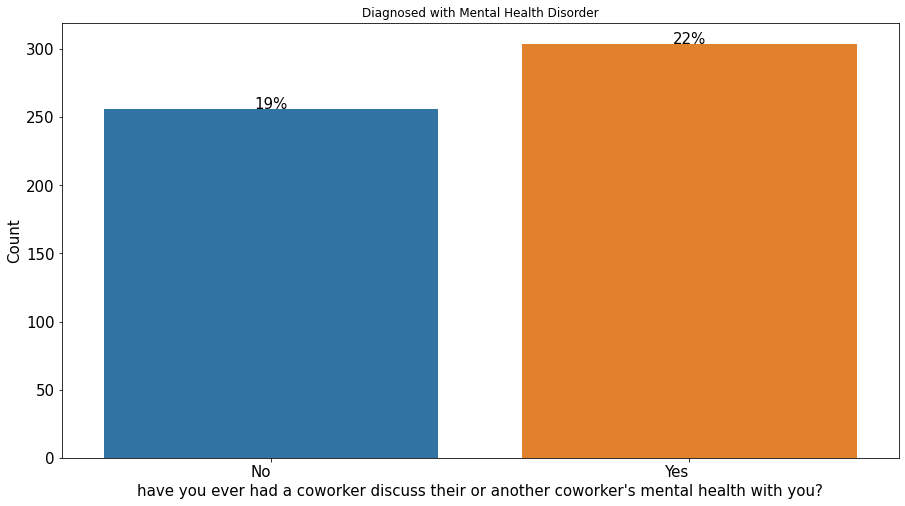

In [75]:
col = 'have you ever had a coworker discuss their or another coworker\'s mental health with you?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [76]:
### 21. Overall, how much importance does your employer place on physical health?

This column has 2910 null values in entire data set and 802 null values in diagnosed data set


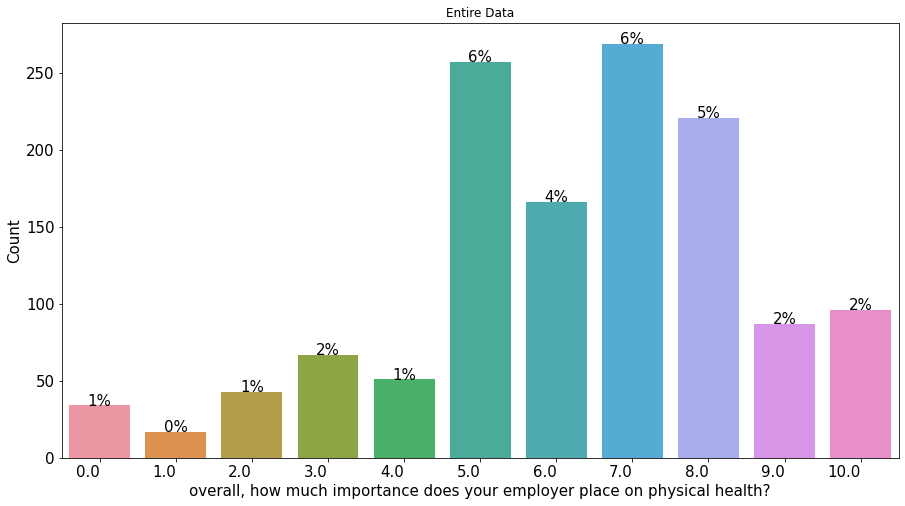

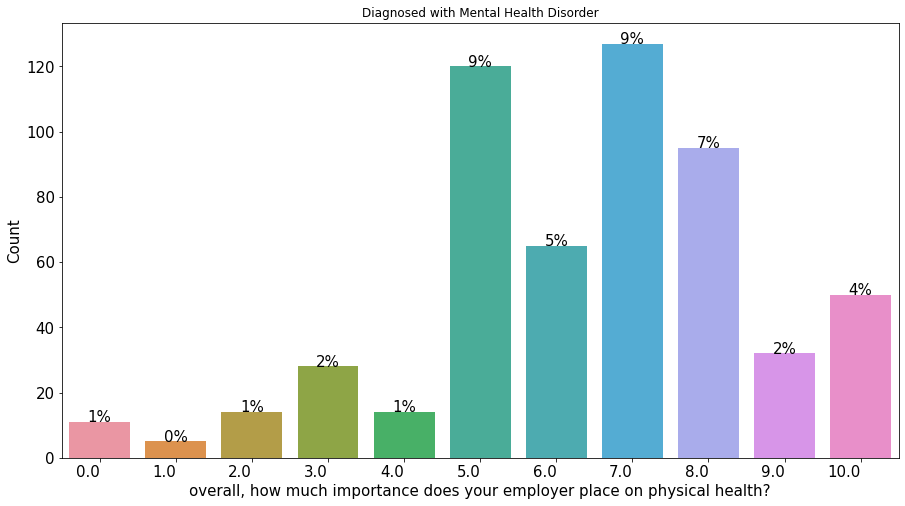

In [77]:
col = 'overall, how much importance does your employer place on physical health?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [78]:
### 22. Overall, how much importance does your employer place on mental health?

This column has 2910 null values in entire data set and 802 null values in diagnosed data set


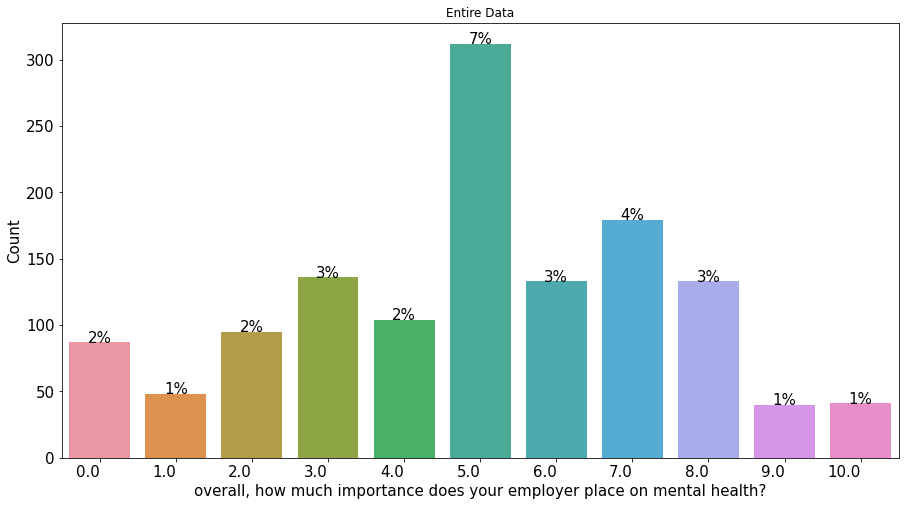

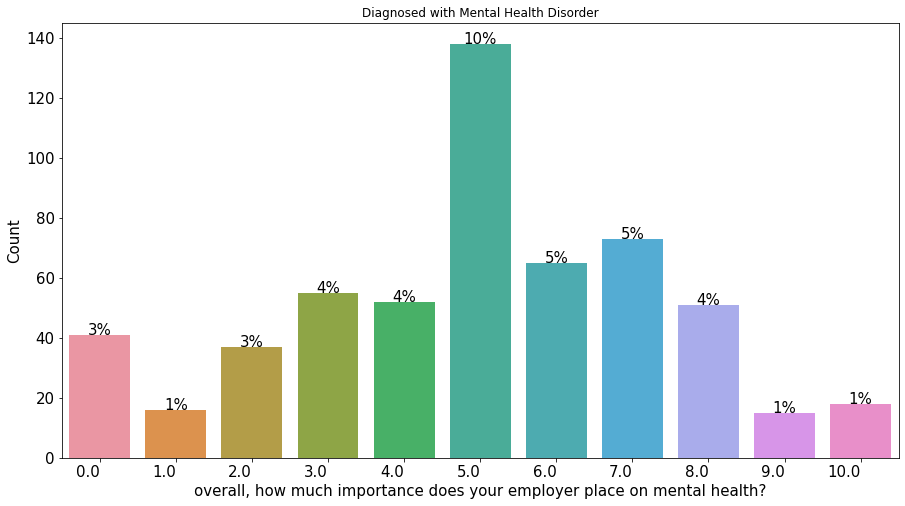

In [79]:
col = 'overall, how much importance does your employer place on mental health?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [80]:
### 23. Do you have previous employers?

This column has 1260 null values in entire data set and 0 null values in diagnosed data set


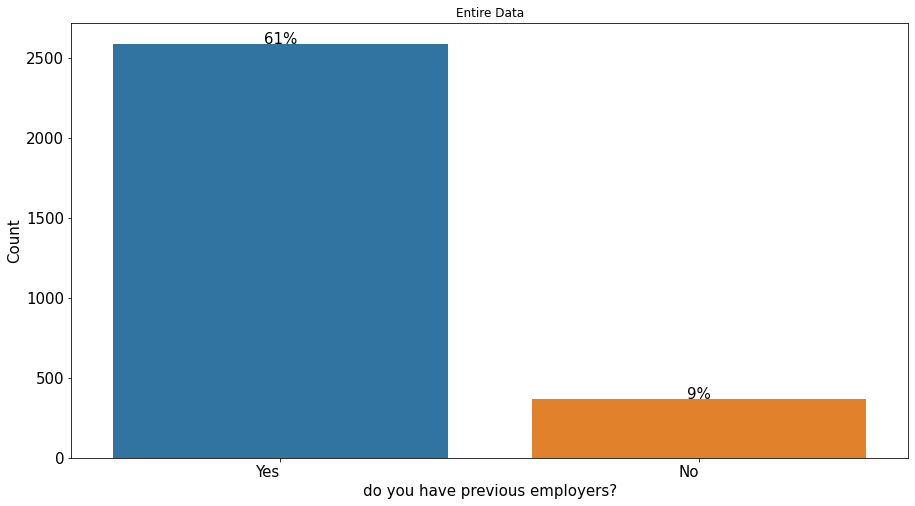

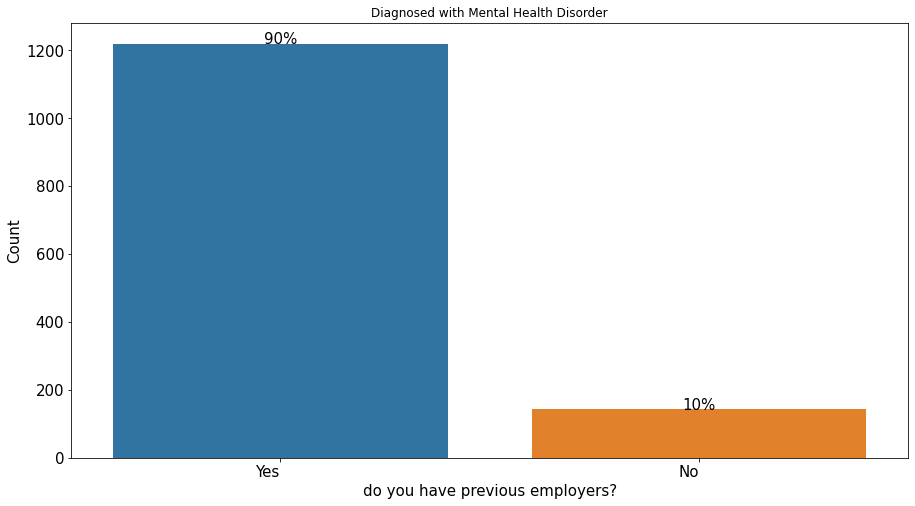

In [81]:
col = 'do you have previous employers?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [82]:
### 24. Do you currently have a mental health disorder?

This column has 1260 null values in entire data set and 0 null values in diagnosed data set


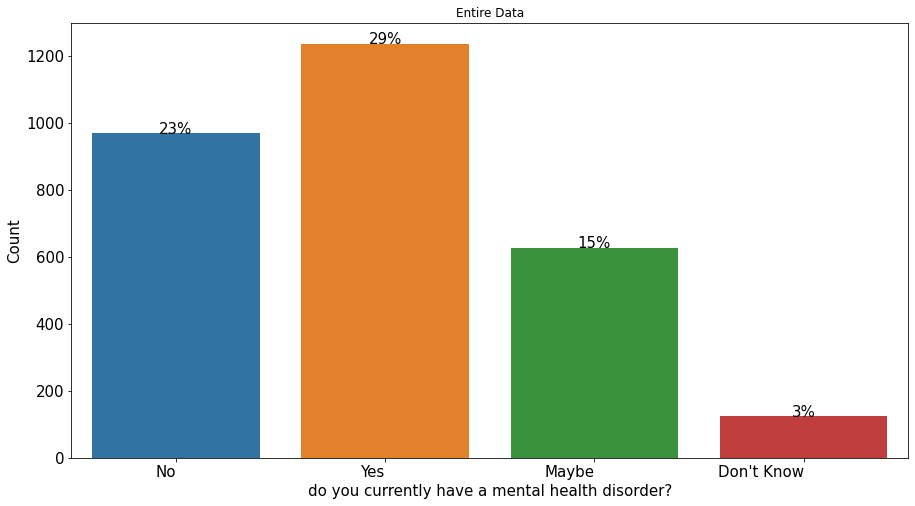

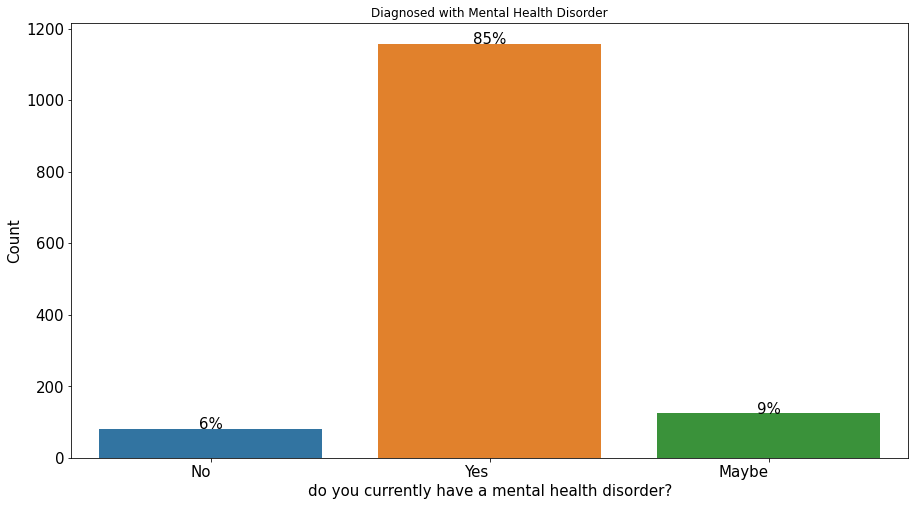

In [83]:
col = 'do you currently have a mental health disorder?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [84]:
### 25. Have you had a mental health disorder in the past?

This column has 1275 null values in entire data set and 0 null values in diagnosed data set


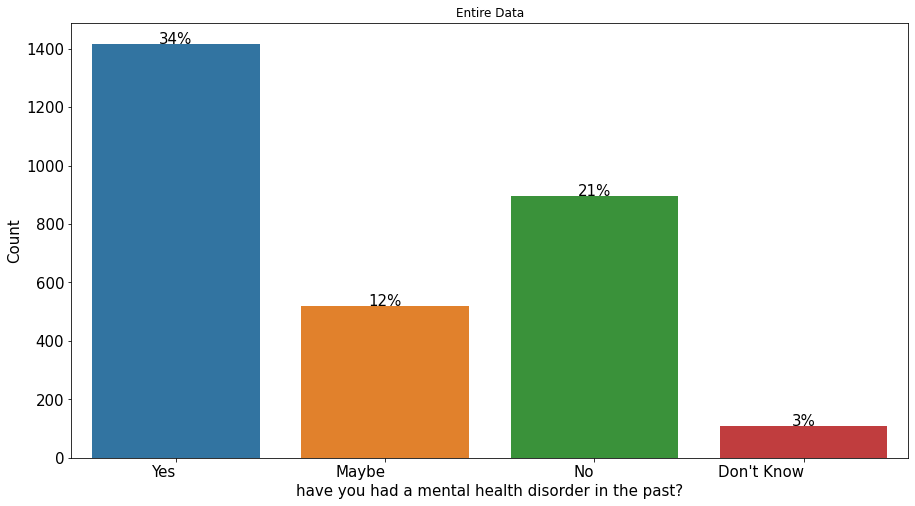

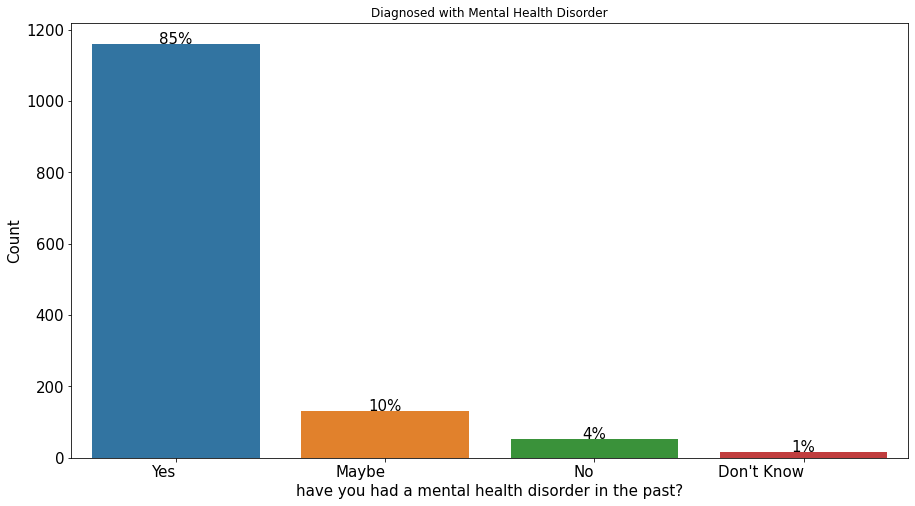

In [85]:
col = 'have you had a mental health disorder in the past?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [86]:
### 26. Have you been diagnosed with a mental health condition by a medical professional?

This column has 2123 null values in entire data set and 0 null values in diagnosed data set


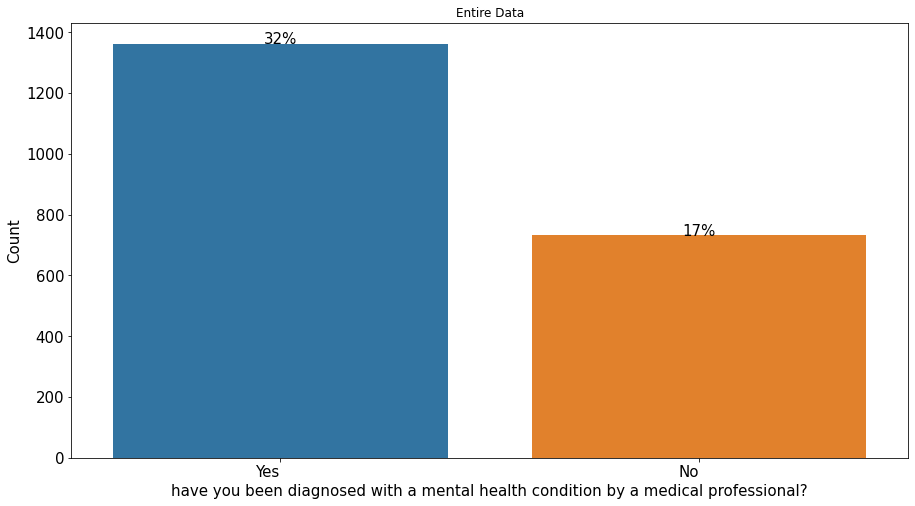

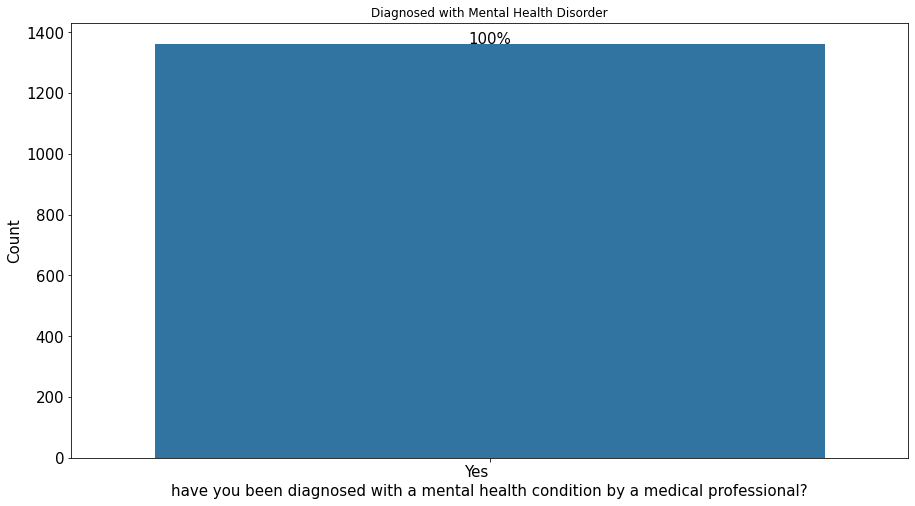

In [87]:
col = 'have you been diagnosed with a mental health condition by a medical professional?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [88]:
### 27. Have you ever sought treatment for a mental health disorder from a mental health professional?

This column has 0 null values in entire data set and 0 null values in diagnosed data set


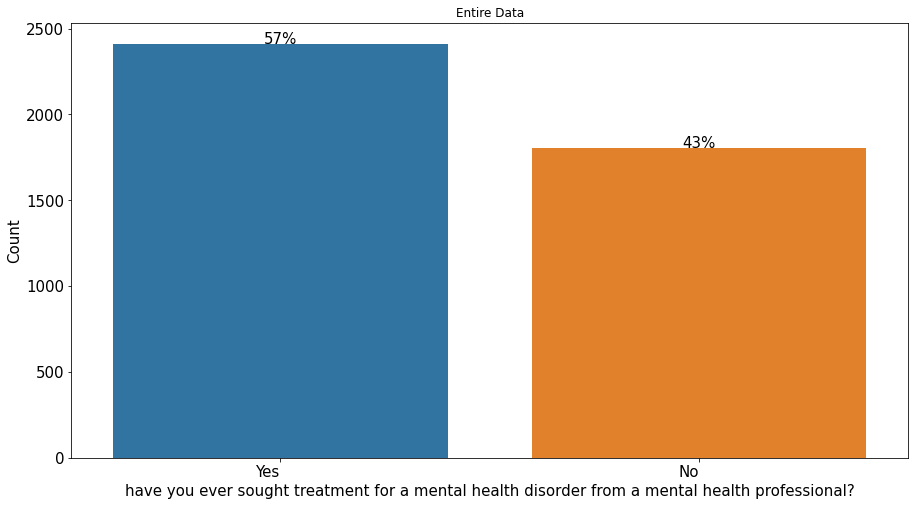

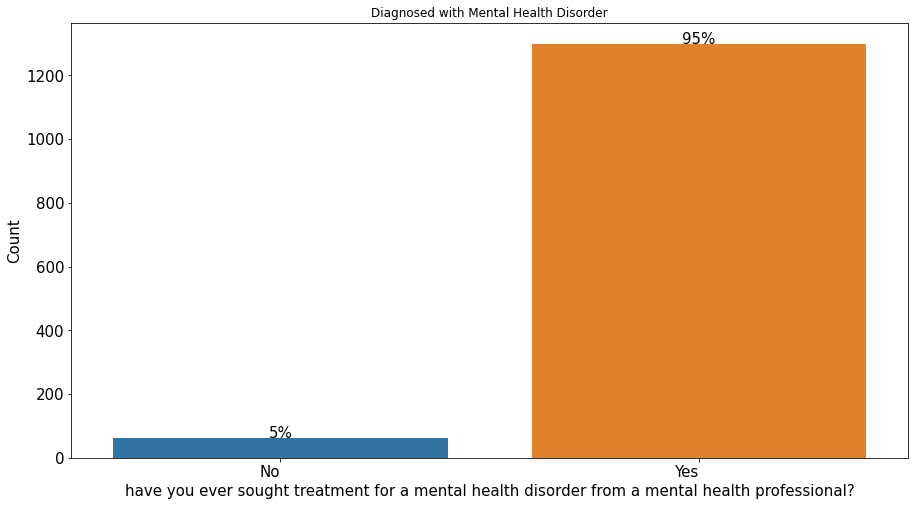

In [89]:
col = 'have you ever sought treatment for a mental health disorder from a mental health professional?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [90]:
### 28. Do you have a family history of mental illness?

This column has 0 null values in entire data set and 0 null values in diagnosed data set


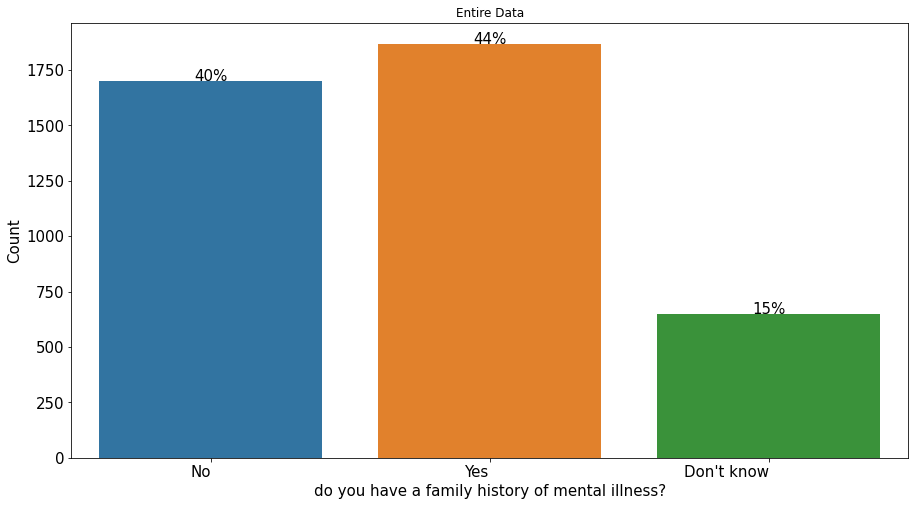

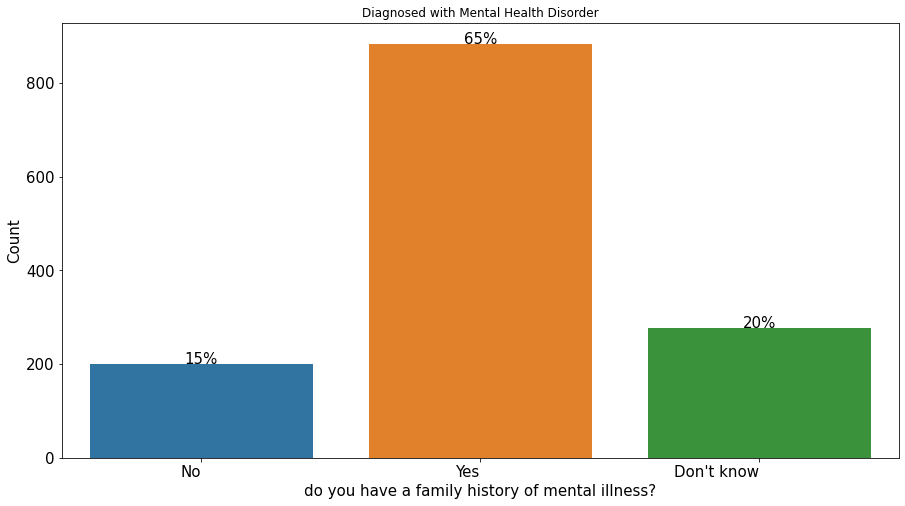

In [91]:
col = 'do you have a family history of mental illness?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [92]:
### 29. If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?

This column has 1260 null values in entire data set and 0 null values in diagnosed data set


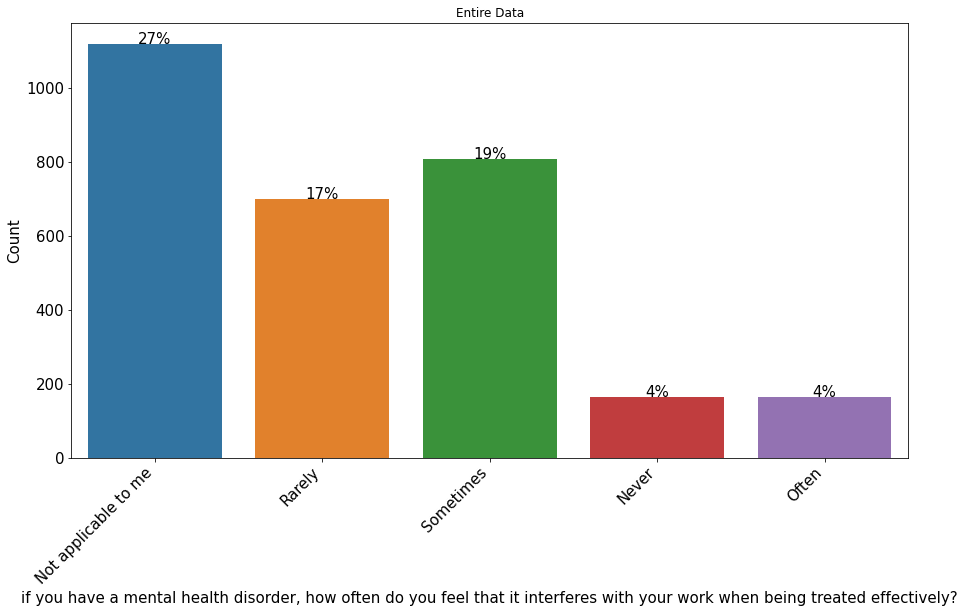

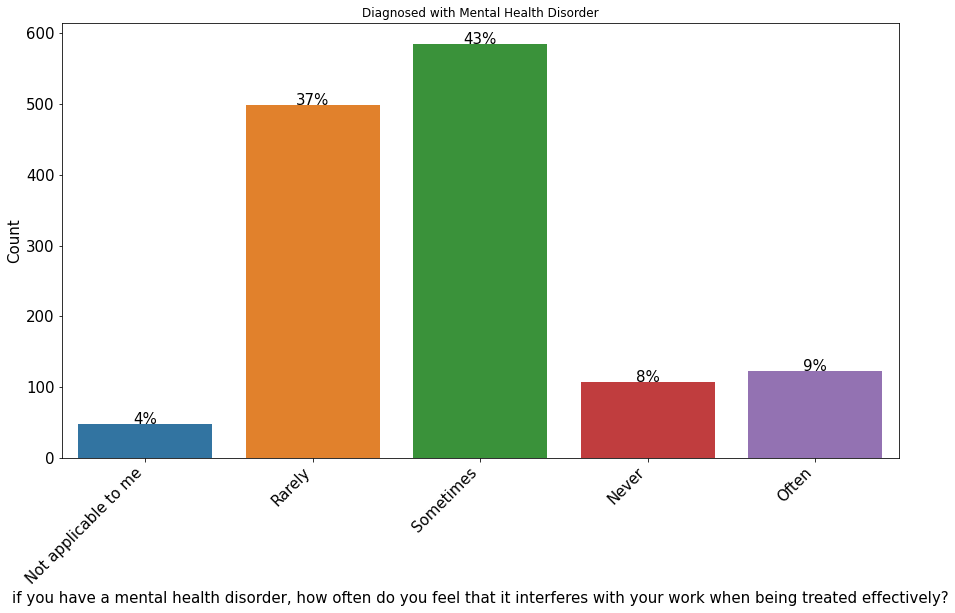

In [93]:
col = 'if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [94]:
### 30. If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?

This column has 1260 null values in entire data set and 0 null values in diagnosed data set


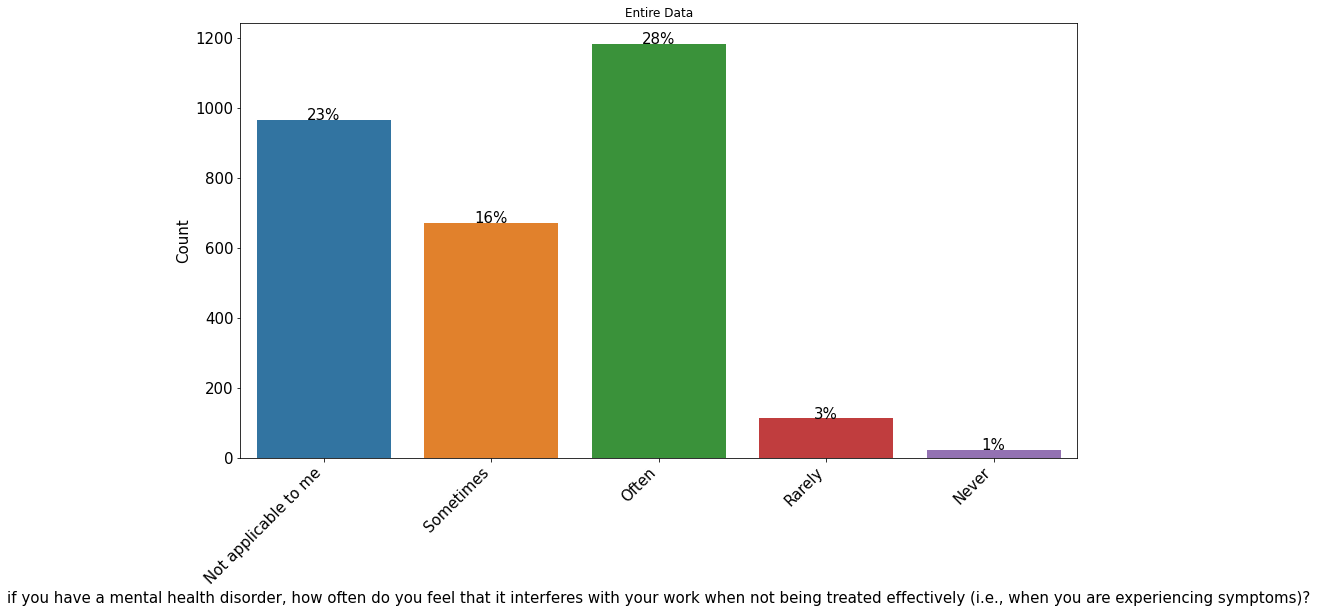

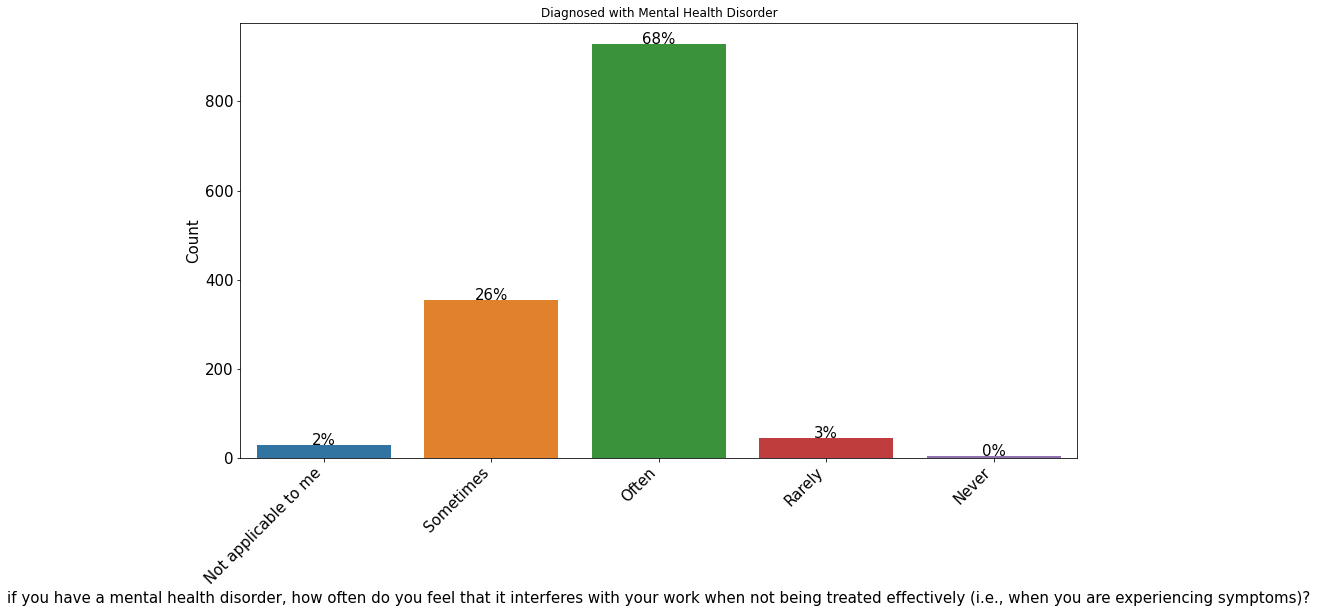

In [95]:
col = 'if you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 45, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [96]:
### 31. Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

This column has 2494 null values in entire data set and 499 null values in diagnosed data set


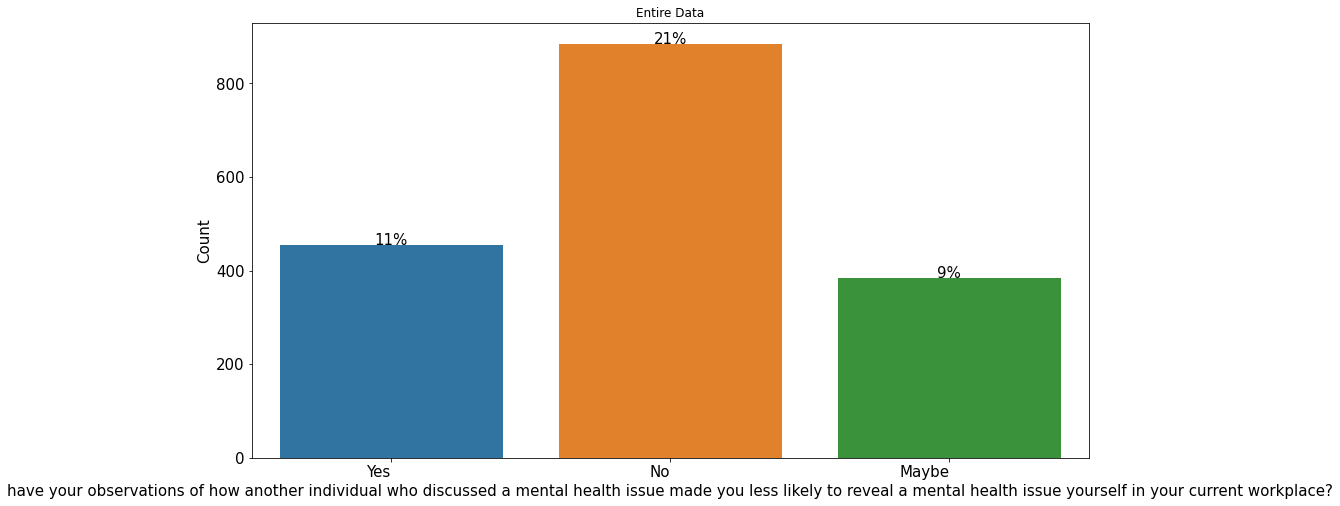

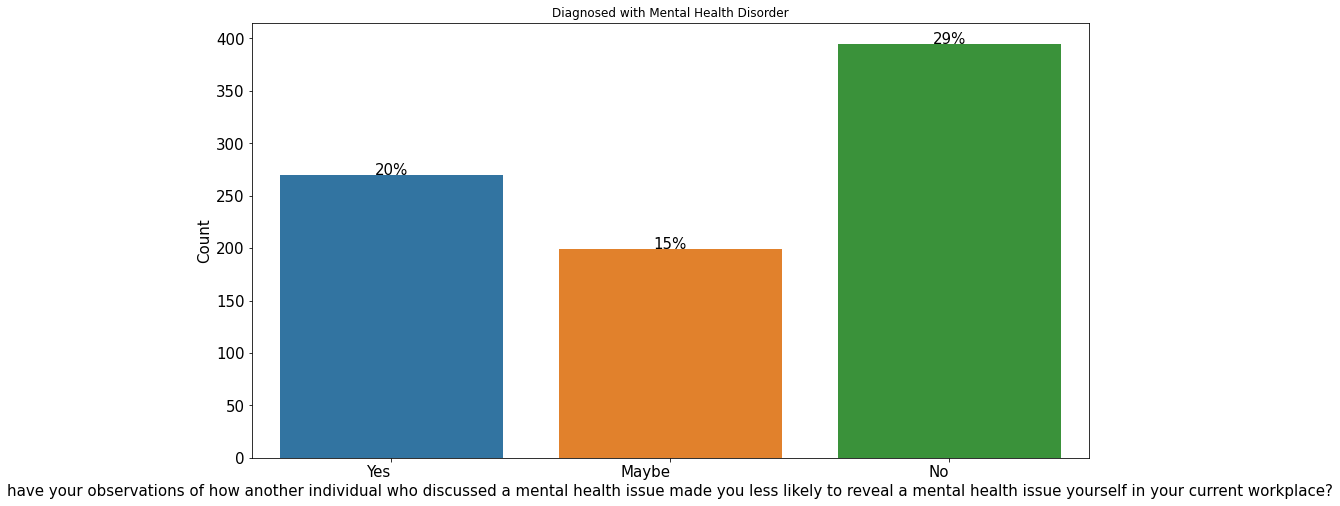

In [97]:
col = 'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [98]:
### 32. Would you be willing to bring up a physical health issue with a potential employer in an interview?

This column has 0 null values in entire data set and 0 null values in diagnosed data set


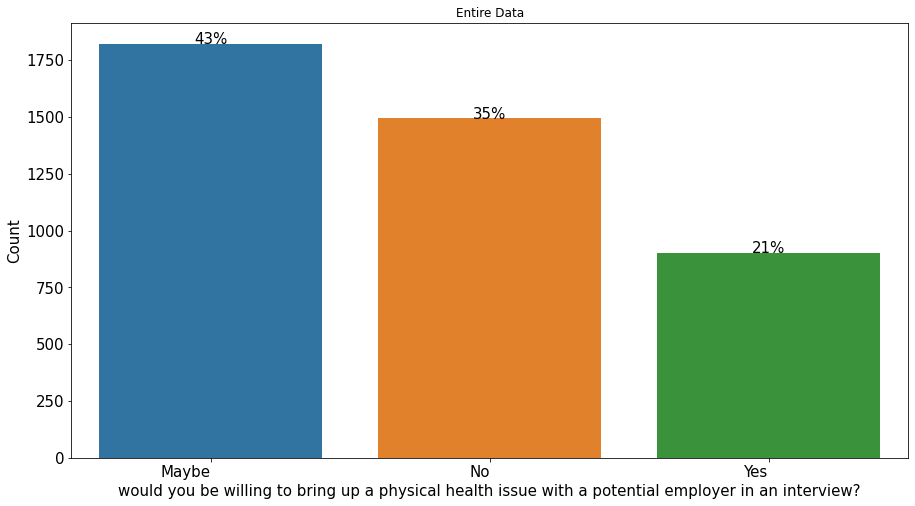

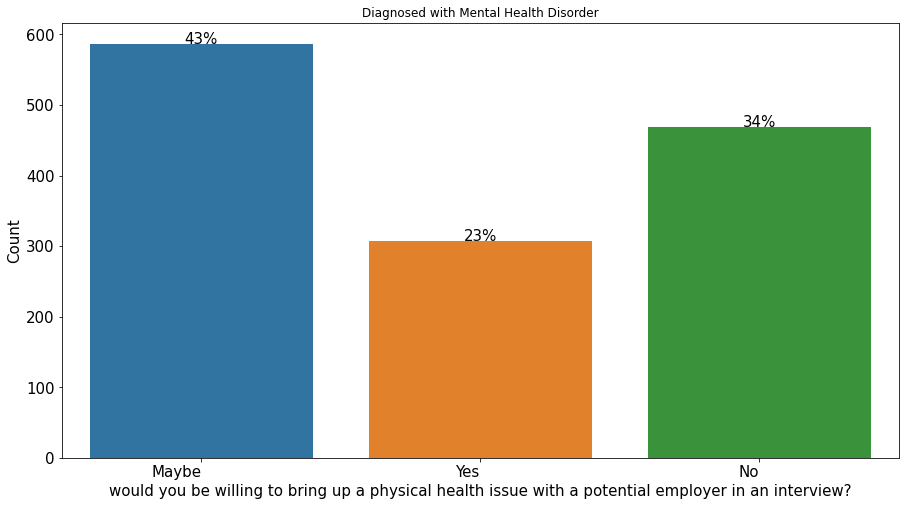

In [99]:
col = 'would you be willing to bring up a physical health issue with a potential employer in an interview?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [100]:
### 33. Would you bring up your mental health with a potential employer in an interview?

This column has 0 null values in entire data set and 0 null values in diagnosed data set


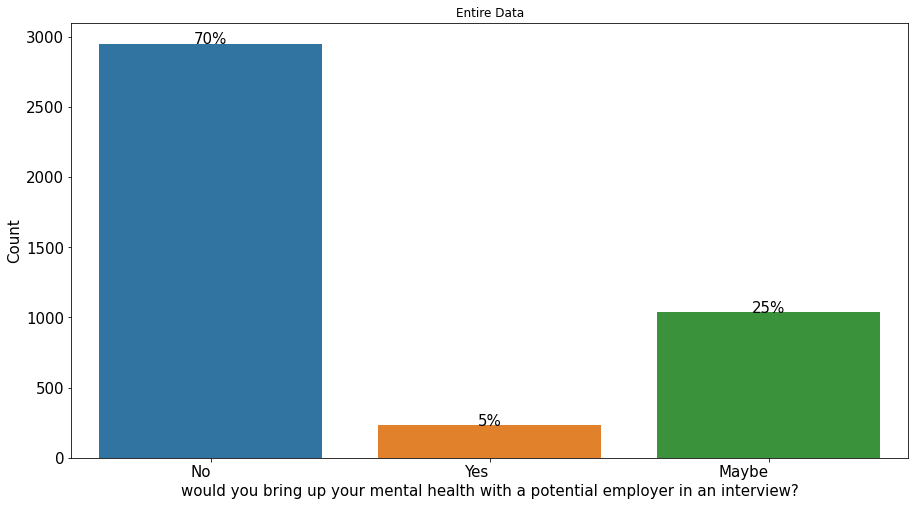

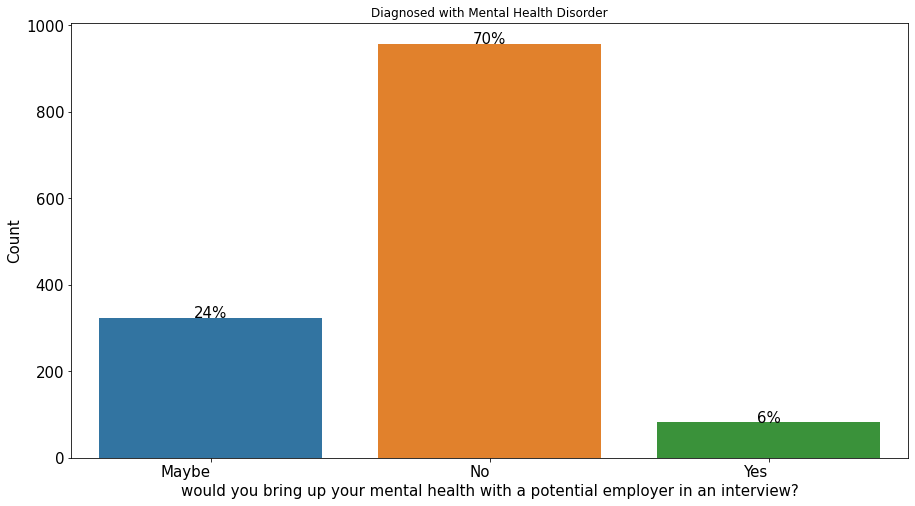

In [101]:
col = 'would you bring up your mental health with a potential employer in an interview?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [102]:
### 34. Are you openly identified at work as a person with a mental health issue?

This column has 2695 null values in entire data set and 718 null values in diagnosed data set


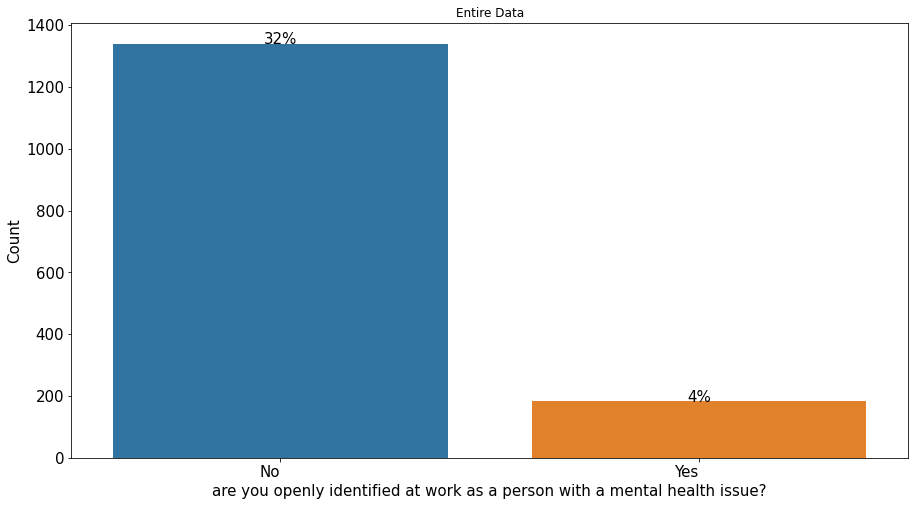

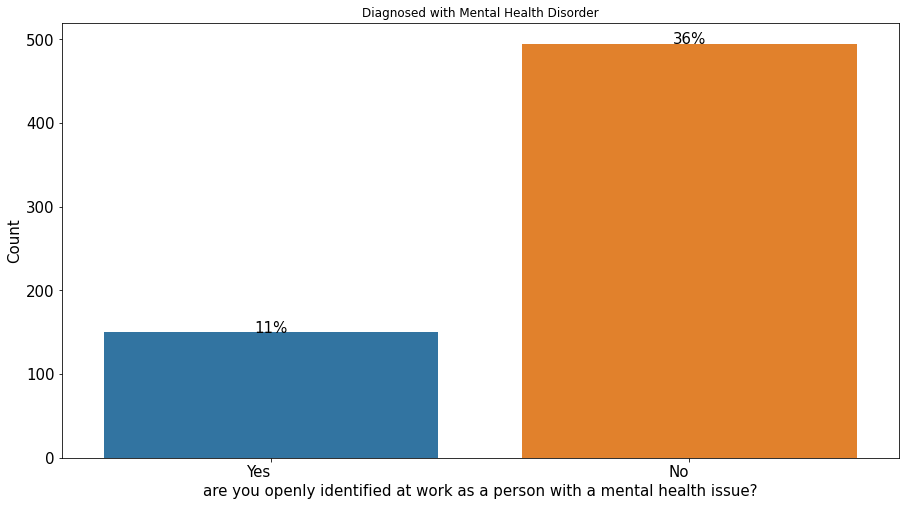

In [103]:
col = 'are you openly identified at work as a person with a mental health issue?'
print('This column has {} null values in entire data set and {} null values in diagnosed data set'.format(df[col].isna().sum(), df_y[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df_y)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Diagnosed with Mental Health Disorder')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df_y.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

In [104]:
### Dropping Columns With Very High Null Values

In [105]:
for i in df.columns:
    if df[i].isna().mean() > 0.31:
        df.drop(i, axis = 1, inplace = True)

In [106]:
### Handling Null Values

In [107]:
objtype = ['object']
numtype = ['int64', 'float64']
for i in df.columns:
    if df[i].dtypes in objtype:
        imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        imputer.fit(df[[i]])
        df[[i]] = imputer.transform(df[[i]])
    elif df[i].dtypes in numtype:
        imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
        imputer.fit(df[[i]])
        df[[i]] = imputer.transform(df[[i]])

NameError: name 'SimpleImputer' is not defined

In [ ]:
### Encoding Categorical Variables

In [ ]:
dummy = []
label = []
for i in df.columns:
    if df[i].dtypes == object:
        if df[i].nunique() > 2:
            dummy.append(i)
        else:
            label.append(i)

In [ ]:
df_dummy = pd.get_dummies(df[dummy], prefix_sep = '_', drop_first = True)
df = df.drop(dummy, axis = 1)
df = pd.concat([df, df_dummy], axis = 1)
for i in label:
    df[i] = np.where(df[i] == 'Yes', 1, 0)

In [ ]:
### Train - Test Split

In [ ]:
X = df.drop('have you been diagnosed with a mental health condition by a medical professional?', axis = 1)
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 17)

In [ ]:
### Shapes of Train, Validation, Test Data Set

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
### Feature Selection

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
fi = pd.DataFrame(etc.feature_importances_, columns = ['Importance'], index = X_train.columns)
features = fi.sort_values(by = 'Importance', ascending = False).reset_index()

In [ ]:
features.to_csv('FI.csv')

In [ ]:
selected_features = []
for i in range(0, 21):
    selected_features.append(features['index'][i])

In [ ]:
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

In [ ]:
### New Shapes of Train, Validation and Test Data Set with Selected Features

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
### LogisticRegression()

In [ ]:
lr = LogisticRegression(verbose = 2)
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_val_pred_lr = lr.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_lr))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_lr))
print('Train f1_score: ', f1_score(y_train, y_train_pred_lr))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_lr))

In [ ]:
### DecisionTreeClassifier()

In [ ]:
dtc = DecisionTreeClassifier()
possible_parameter_values = {'criterion' : ['gini', 'entropy'],
                             'splitter' : ['best', 'random'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
dtc_rscv = RandomizedSearchCV(estimator = dtc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
dtc_rscv.fit(X_train, y_train)
dtc_rscv.best_params_

In [ ]:
y_train_pred_dtc = dtc_rscv.predict(X_train)
y_val_pred_dtc = dtc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_dtc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_dtc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_dtc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_dtc))

In [ ]:
### RandomForestClassifier()

In [ ]:
rfc = RandomForestClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'criterion' : ['gini', 'entropy'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
rfc_rscv = RandomizedSearchCV(estimator = rfc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
rfc_rscv.fit(X_train, y_train)
rfc_rscv.best_params_

In [ ]:
y_train_pred_rfc = rfc_rscv.predict(X_train)
y_val_pred_rfc = rfc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_rfc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_rfc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_rfc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_rfc))

In [ ]:
### AdaBoostClassifier()

In [ ]:
abc = AdaBoostClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
abc_rscv = RandomizedSearchCV(estimator = abc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
abc_rscv.fit(X_train, y_train)
abc_rscv.best_params_

In [ ]:
y_train_pred_abc = abc_rscv.predict(X_train)
y_val_pred_abc = abc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_abc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_abc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_abc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_abc))

In [ ]:
### GradientBoostingClassifier()

In [ ]:
gbc = GradientBoostingClassifier()
possible_parameter_values = {'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)],
                             'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
gbc_rscv = RandomizedSearchCV(estimator = gbc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
gbc_rscv.fit(X_train, y_train)
gbc_rscv.best_params_

In [ ]:
y_train_pred_gbc = gbc_rscv.predict(X_train)
y_val_pred_gbc = gbc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_gbc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_gbc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_gbc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_gbc))

In [ ]:
### KNeighborsClassifier()

In [ ]:
knc = KNeighborsClassifier()
possible_parameter_values = {'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 11, step = 1)],
                             'weights' : ['uniform', 'distance']}
knc_rscv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
knc_rscv.fit(X_train, y_train)
knc_rscv.best_params_

In [ ]:
y_train_pred_knc = knc_rscv.predict(X_train)
y_val_pred_knc = knc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_knc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_knc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_knc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_knc))

In [ ]:
### XGBClassifier()

In [ ]:
xgbc = XGBClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)], 
                             'use_label_encoder' : [True, False], 
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)], 
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
xgbc_rscv = RandomizedSearchCV(estimator = xgbc, param_distributions = possible_parameter_values, cv = 5, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
xgbc_rscv.fit(X_train, y_train)
xgbc_rscv.best_params_

In [ ]:
y_train_pred_xgbc = xgbc_rscv.predict(X_train)
y_val_pred_xgbc = xgbc_rscv.predict(X_val)

In [ ]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_xgbc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_xgbc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_xgbc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_xgbc))

In [ ]:
### Evaluating the Consistency of the Model with LogisticRegression()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_lr = LogisticRegression()
    test_model_lr.fit(X_train, y_train)
    y_train_pred_tlr = test_model_lr.predict(X_train)
    y_val_pred_tlr = test_model_lr.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tlr))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tlr))
    f1_train.append(f1_score(y_train, y_train_pred_tlr))
    f1_val.append(f1_score(y_val, y_val_pred_tlr))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with DecisionTreeClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_dtc = DecisionTreeClassifier(splitter = 'random', min_samples_split = 29, min_samples_leaf = 38, max_depth = 35, criterion = 'gini')
    test_model_dtc.fit(X_train, y_train)
    y_train_pred_tdtc = test_model_dtc.predict(X_train)
    y_val_pred_tdtc = test_model_dtc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tdtc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tdtc))
    f1_train.append(f1_score(y_train, y_train_pred_tdtc))
    f1_val.append(f1_score(y_val, y_val_pred_tdtc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with RandomForestClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_rfc = RandomForestClassifier(n_estimators = 500, min_samples_split = 26, min_samples_leaf = 5, max_depth = 45, criterion = 'gini')
    test_model_rfc.fit(X_train, y_train)
    y_train_pred_trfc = test_model_rfc.predict(X_train)
    y_val_pred_trfc = test_model_rfc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_trfc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_trfc))
    f1_train.append(f1_score(y_train, y_train_pred_trfc))
    f1_val.append(f1_score(y_val, y_val_pred_trfc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with AdaBoostClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_abc = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.544)
    test_model_abc.fit(X_train, y_train)
    y_train_pred_tabc = test_model_abc.predict(X_train)
    y_val_pred_tabc = test_model_abc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tabc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tabc))
    f1_train.append(f1_score(y_train, y_train_pred_tabc))
    f1_val.append(f1_score(y_val, y_val_pred_tabc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with GradientBoostingClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_gbc = GradientBoostingClassifier(n_estimators = 300, min_samples_split = 100, min_samples_leaf = 30, max_depth = 65, learning_rate = 0.407)
    test_model_gbc.fit(X_train, y_train)
    y_train_pred_tgbc = test_model_gbc.predict(X_train)
    y_val_pred_tgbc = test_model_gbc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tgbc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tgbc))
    f1_train.append(f1_score(y_train, y_train_pred_tgbc))
    f1_val.append(f1_score(y_val, y_val_pred_tgbc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with KNeighborsClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_knc = KNeighborsClassifier(weights = 'uniform', n_neighbors = 2)
    test_model_knc.fit(X_train, y_train)
    y_train_pred_tknc = test_model_knc.predict(X_train)
    y_val_pred_tknc = test_model_knc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tknc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tknc))
    f1_train.append(f1_score(y_train, y_train_pred_tknc))
    f1_val.append(f1_score(y_val, y_val_pred_tknc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### Evaluating the Consistency of the Model with XGBoostClassifier()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_xgbc = XGBClassifier(use_label_encoder = False, n_estimators = 50, max_depth = 35, learning_rate = 0.737)
    test_model_xgbc.fit(X_train, y_train)
    y_train_pred_txgbc = test_model_xgbc.predict(X_train)
    y_val_pred_txgbc = test_model_xgbc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_txgbc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_txgbc))
    f1_train.append(f1_score(y_train, y_train_pred_txgbc))
    f1_val.append(f1_score(y_val, y_val_pred_txgbc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

In [ ]:
### KMeans()

In [ ]:
X = df[selected_features]
y = df['have you been diagnosed with a mental health condition by a medical professional?']
kmc = KMeans(n_clusters = 2)
kmc.fit_predict(X)
X['cluster'] = pd.Series(kmc.labels_)

In [ ]:
print('Accuracy: ', accuracy_score(y, X['cluster']))
print('f1_score: ', f1_score(y, X['cluster']))

In [ ]:
prediction = test_model_rfc.predict(X_test)
prediction

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, prediction))
print('Test f1 score: ', f1_score(y_test, prediction))

In [ ]:
test_model_rfc.predict_proba(X_test)

In [ ]:
### Final Prediction

In [ ]:
test_model_rfc.predict(X_test)

In [ ]:
p = pd.DataFrame(test_model_rfc.predict_proba(X_test))

In [ ]:
p.head()

In [ ]:
### Exporting Predictions to CSV

In [ ]:
prediction = pd.DataFrame((prediction))
prediction.to_csv('Prediction.csv')

In [ ]:
### Pickle

In [ ]:
file = open(r'C:\\Users\\Brajesh Mohapatra\\Python\\Mental Health Prediction\\mental_health_prediction.pkl', 'wb')
pickle.dump(test_model_rfc, file)

In [ ]:
prediction[1][1] * 100